In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations
import time

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [3]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_8/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_8/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

Input_1   Input_2   Input_3   Input_4   Input_5   Input_6   Input_7  \
0   0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1   0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2   0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3   0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4   0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   
5   0.778818  0.003419  0.337983  0.519528  0.820907  0.537247  0.551347   
6   0.908649  0.062250  0.238260  0.766604  0.132336  0.990244  0.688068   
7   0.586371  0.880736  0.745021  0.546035  0.009649  0.748992  0.230907   
8   0.761137  0.854672  0.382124  0.337352  0.689708  0.309853  0.631380   
9   0.984933  0.699506  0.998885  0.180148  0.580143  0.231087  0.490827   
10  0.112071  0.437736  0.596599  0.592776  0.226982  0.410105  0.921238   
11  0.791888  0.576191  0.694528  0.283424  0.136755  0.279162  0.842767   
12  0.143550  0.937415  0.232325  0.009043  0.414579  0.409325  0.553779   
13  0.769917  0.458759  0.559000  0.694604  0.503199  0.728346  0.784254   
14  0.056447  0.065956  0.022929  0.038786  0.403935  0.801055  0.488307   
15  0.862437  0.482734  0.281869  0.544102  0.887490  0.382655  0.601902   
16  0.351512  0.590065  0.909436  0.678408  0.212826  0.088460  0.410153   
17  0.735904  0.034612  0.728030  0.147427  0.295743  0.445117  0.975180   
18  0.680294  0.255105  0.862188  0.134396  0.326329  0.287907  0.435010   
19  0.044329  0.013581  0.258198  0.577644  0.051280  0.158563  0.591030   
20  0.778345  0.751146  0.314142  0.902986  0.335382  0.386323  0.748972   
21  0.898887  0.523642  0.876783  0.218696  0.900261  0.282766  0.911078   
22  0.145120  0.119328  0.420888  0.387609  0.155423  0.875172  0.510560   
23  0.338954  0.566932  0.376751  0.098916  0.659452  0.245548  0.762483   
24  0.176150  0.293961  0.975680  0.793936  0.923401  0.030842  0.803255   
25  0.028947  0.028279  0.481372  0.613175  0.672660  0.022113  0.601483   
26  0.192640  0.630677  0.416796  0.490529  0.796086  0.654567  0.276241   
27  0.943185  0.218851  0.721184  0.424597  0.986902  0.535183  0.714743   
28  0.532721  0.833693  0.071399  0.116811  0.730693  0.937376  0.866508   
29  0.447096  0.843953  0.729546  0.639151  0.409287  0.132646  0.035909   
30  0.382225  0.557136  0.853102  0.333796  0.265721  0.480873  0.237647   
31  0.532820  0.862308  0.538267  0.049443  0.719701  0.906706  0.108231   
32  0.394865  0.331802  0.740754  0.697862  0.737404  0.783777  0.254495   
33  0.985945  0.873054  0.070393  0.053587  0.734153  0.520259  0.811040   
34  0.964573  0.973980  0.663753  0.662216  0.673122  0.905238  0.458875   
35  0.472071  0.168203  0.086428  0.452656  0.480619  0.622439  0.928974   
36  0.856007  0.638894  0.326192  0.668503  0.240298  0.210299  0.167546   
37  0.810032  0.635046  0.269548  0.869605  0.661922  0.252259  0.765670   
38  0.796253  0.007037  0.355697  0.487566  0.740520  0.706650  0.992914   
39  0.481245  0.102461  0.219486  0.677322  0.247509  0.244341  0.163825   

     Input_8    Output  
0   0.734281  7.398721  
1   0.107132  7.005227  
2   0.367320  8.459482  
3   0.292472  8.284008  
4   0.593882  8.606117  
5   0.660032  8.541748  
6   0.742496  7.327435  
7   0.097916  7.299872  
8   0.041956  7.957875  
9   0.313683  5.592193  
10  0.674753  7.854541  
11  0.625328  6.791986  
12  0.205841  8.976554  
13  0.663131  7.379083  
14  0.893085  9.598482  
15  0.476462  8.159983  
16  0.195724  7.131624  
17  0.374340  6.767963  
18  0.364200  7.433744  
19  0.077953  9.013075  
20  0.988755  7.310894  
21  0.472398  5.841067  
22  0.728611  9.141639  
23  0.732153  8.817558  
24  0.595898  6.451943  
25  0.524885  8.830745  
26  0.295518  9.344274  
27  0.960094  6.887846  
28  0.127902  8.042213  
29  0.446838  7.692368  
30  0.768632  7.923759  
31  0.525348  8.421759  
32  0.871146  8.278062  
33  0.103360  7.113457  
34  0.560918 

In [4]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Input_5':0.111111,'Input_6':0.111111,'Input_7':0.111111,'Input_8':0.111111,'Output':9.56743}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[5.0e-01,1.0e-06,2.5e-01,7.5e-01,2.5e-01,2.5e-01,2.5e-01,7.5e-01,9.033300299999]
df.loc[len(df)] = new_data

new_data=[0.15,0.15,0.35,0.55,0.15,0.725,0.55,0.95,9.170675]
df.loc[len(df)] = new_data

# 14 may
df.loc[len(df)]=[0.333334,0.5,0.5,0.333334,0.333334,0.333334,0.666666,0.5,8.751078688886]
df.loc[len(df)]=[0.200001,0.200001,0.4,0.4,0.200001,0.799999,0.6,0.799999,9.1023007399954]
df.loc[len(df)]=[0.157895,0.052632,0.157895,0.333333,0.210527,0.333333,0.31579,0.5,9.7185386826085]

# 17 may
df.loc[len(df)]=[0.25,0.052632,0.210527,0.5,0.210527,0.5,0.210527,0.75,9.6273548350665]

# 20 may
df.loc[len(df)]=[0.052632,0.052632,0.157895,0.511111,0.263158,0.499999,0.526316,0.749999,9.4939825701369]
df.loc[len(df)]=[1.0e-06,2.0e-01,2.5e-01,1.0e-06,7.5e-01,5.0e-01,2.5e-01,1.0e-06,9.8695508199969]

# 8 jun
df.loc[len(df)]=[1.00000e-06,3.33334e-01,1.00000e-06,1.00000e-06,9.99999e-01,5.00000e-01,1.00000e-06,8.33333e-01,9.7677466955466]

# 13 jun
df.loc[len(df)]=[5.26320e-02,4.73684e-01,1.00000e-06,1.00000e-06,5.26316e-01,1.00000e-06,1.05264e-01,1.00000e-06,9.476142128]
df.loc[len(df)]=[0.166667,0.333334,0.166667,0.166667,0.666666,0.5,0.166667,0.5,9.941077316] #** new max

# 18 jun
df.loc[len(df)]=[1.00000e-06,1.66667e-01,1.66667e-01,1.66667e-01,6.66666e-01,6.66666e-01,1.66667e-01,8.33333e-01,9.9310782755521]
df.loc[len(df)]=[0.09091,0.09091,0.09091,0.181819,0.90909,0.999999,0.181819,0.9,9.725136171066]

# 21 jun
df.loc[len(df)]=[1.50001e-01,1.00000e-06,1.75001e-01,5.00010e-02,7.50000e-01,4.50001e-01,1.66667e-01,9.00000e-01,9.941452952214]

# 24 jun
df.loc[len(df)]=[1.00001e-01,7.50010e-02,1.16667e-01,2.83334e-01,8.25000e-01,6.60000e-01,1.08334e-01,1.00000e-06,9.8973461966619]

# 28 jun
df.loc[len(df)]=[0.100001,0.133334,0.116667,0.175001,0.826667,0.495001,0.225,0.625,9.9968708333285]
df.loc[len(df)]=[0.166667,0.166667,0.166667,0.166667,0.833333,0.5,0.166667,0.666666,9.9832998799989]

# 1 jul
df.loc[len(df)]=[0.096667,0.150001,0.13,0.1366,0.786667,0.500001,0.1966,0.570001,9.9995962237754]
df.loc[len(df)]=[0.1,0.150001,0.13,0.156667,0.796667,0.500001,0.2,0.603334,9.9999488851089] #** max

# 6 jul
df.loc[len(df)]=[0.105715,0.155715,0.132858,0.148572,0.797144,0.500001,0.197143,0.6,9.999855069382]

# 9 jul
df.loc[len(df)]=[0.1,0.145001,0.130001,0.145001,0.800001,0.50375,0.20375,0.585001,9.9998853354944]

# 13 jul
df.loc[len(df)]=[0.1,0.15375,0.130001,0.15375,0.800001,0.50375,0.20375,0.6075,9.9999240624965]

# 15 jul
df.loc[len(df)]=[0.1,0.150001,0.13,0.150001,0.800001,0.500001,0.20125,0.59,9.9999868749965] #**max

# 20 jul
df.loc[len(df)]=[0.1,0.15,0.13,0.15,0.8,0.5,0.2,0.595,9.9999975] #**max

#Print
df

Input_1   Input_2   Input_3   Input_4   Input_5   Input_6   Input_7  \
0   0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1   0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2   0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3   0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4   0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   
..       ...       ...       ...       ...       ...       ...       ...   
60  0.105715  0.155715  0.132858  0.148572  0.797144  0.500001  0.197143   
61  0.100000  0.145001  0.130001  0.145001  0.800001  0.503750  0.203750   
62  0.100000  0.153750  0.130001  0.153750  0.800001  0.503750  0.203750   
63  0.100000  0.150001  0.130000  0.150001  0.800001  0.500001  0.201250   
64  0.100000  0.150000  0.130000  0.150000  0.800000  0.500000  0.200000   

     Input_8    Output  
0   0.734281  7.398721  
1   0.107132  7.005227  
2   0.367320  8.459482  
3   0.292472  8.284008  
4   0.593882  8.606117  
..       ...       ...  
60  0.600000  9.999855  
61  0.585001  9.999885  
62  0.607500  9.999924  
63  0.590000  9.999987  
64  0.595000  9.999997  

[65 rows x 9 columns]

In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5    Input_6  \
count  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000   
mean    0.379517   0.354345   0.383666   0.352886   0.520322   0.472876   
std     0.319672   0.294806   0.285718   0.254310   0.288254   0.249442   
min     0.000001   0.000001   0.000001   0.000001   0.009649   0.000001   
25%     0.100001   0.119328   0.132858   0.148572   0.247509   0.282766   
50%     0.250000   0.249076   0.314142   0.333333   0.580143   0.500000   
75%     0.680294   0.576191   0.559000   0.550000   0.796086   0.654567   
max     0.985945   0.973980   0.998885   0.902986   0.999999   0.999999   

         Input_7    Input_8     Output  
count  65.000000  65.000000  65.000000  
mean    0.451351   0.535217   8.547762  
std     0.277694   0.280530   1.217028  
min     0.000001   0.000001   5.592193  
25%     0.200000   0.364200   7.436594  
50%     0.458875   0.593882   8.751079  
75%     0.

In [6]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_8/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_8/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

Input_1   Input_2   Input_3   Input_4   Input_5   Input_6   Input_7  \
0   0.314122  0.135028  0.590443  0.949040  0.053135  0.970479  0.813083   
1   0.759227  0.597017  0.967061  0.192829  0.618527  0.703131  0.721581   
2   0.217101  0.244915  0.338321  0.180665  0.183118  0.326224  0.995490   
3   0.842243  0.750804  0.089671  0.077539  0.606283  0.964488  0.404794   
4   0.261524  0.667035  0.772497  0.956920  0.784328  0.410644  0.818515   
5   0.782571  0.794269  0.041638  0.611656  0.173100  0.611459  0.302262   
6   0.433062  0.137062  0.585539  0.232842  0.436364  0.863789  0.618432   
7   0.717437  0.046466  0.581910  0.555016  0.963411  0.008213  0.822846   
8   0.962654  0.604982  0.665539  0.598025  0.733950  0.215550  0.834761   
9   0.836486  0.592239  0.604814  0.871671  0.064753  0.941817  0.182029   
10  0.055515  0.255858  0.000848  0.376786  0.509005  0.215161  0.875181   
11  0.043432  0.100047  0.223423  0.016864  0.280007  0.363847  0.328406   
12  0.651164  0.367713  0.170580  0.050537  0.109435  0.407351  0.250285   
13  0.571343  0.583736  0.316729  0.836709  0.457090  0.216721  0.596914   
14  0.398641  0.514052  0.329450  0.480720  0.719671  0.075595  0.506292   
15  0.395026  0.406031  0.317389  0.158428  0.950770  0.765405  0.705244   
16  0.823220  0.579558  0.473790  0.419324  0.061518  0.556674  0.494059   
17  0.606416  0.607509  0.928221  0.585768  0.270980  0.918072  0.367446   
18  0.161228  0.668710  0.059826  0.597343  0.174573  0.433148  0.003214   
19  0.211960  0.020745  0.451016  0.695757  0.061722  0.122802  0.607447   
20  0.715217  0.028323  0.997805  0.815538  0.541830  0.481465  0.313320   
21  0.231948  0.521118  0.128869  0.464770  0.434423  0.015659  0.677177   
22  0.518736  0.975900  0.211083  0.813117  0.994765  0.891860  0.296492   
23  0.237024  0.705305  0.387186  0.052175  0.444922  0.840594  0.245342   
24  0.025991  0.243691  0.994374  0.072536  0.544907  0.641343  0.550256   
25  0.480256  0.804160  0.477869  0.290092  0.719030  0.839297  0.695571   
26  0.305019  0.935739  0.495611  0.484517  0.559680  0.084131  0.662087   
27  0.799318  0.024812  0.712221  0.146584  0.019303  0.315382  0.928278   
28  0.347455  0.889411  0.331045  0.746804  0.546679  0.824943  0.364626   
29  0.239275  0.962163  0.323947  0.603282  0.234147  0.055736  0.704119   
30  0.651226  0.162117  0.132063  0.689388  0.993112  0.519524  0.651115   
31  0.015935  0.016639  0.473473  0.093644  0.710674  0.682740  0.832502   
32  0.830827  0.898205  0.583216  0.497396  0.615878  0.479253  0.377047   
33  0.292128  0.082839  0.342652  0.599540  0.285831  0.239843  0.946970   
34  0.602794  0.962172  0.894938  0.035626  0.105453  0.887138  0.333006   
35  0.663385  0.402947  0.916437  0.386476  0.182464  0.061975  0.896196   
36  0.714156  0.884182  0.643813  0.634290  0.897645  0.779109  0.799947   
37  0.833634  0.011918  0.403601  0.737031  0.116667  0.632336  0.914606   
38  0.005540  0.367478  0.552283  0.652594  0.053341  0.946465  0.969755   
39  0.941721  0.045513  0.953840  0.853008  0.939450  0.999354  0.760737   

     Input_8    Output  
0   0.624344  7.381537  
1   0.264109  6.214066  
2   0.438287  8.343738  
3   0.348845  8.202355  
4   0.559037  7.017574  
5   0.031143  8.154362  
6   0.577167  8.599881  
7   0.398169  7.414964  
8   0.477506  6.353078  
9   0.871798  7.048916  
10  0.308414  8.839650  
11  0.832396  9.755085  
12  0.888408  9.069804  
13  0.348206  8.330911  
14  0.334632  9.082359  
15  0.610065  9.062594  
16  0.263328  7.882110  
17  0.576937  6.805564  
18  0.293897  9.221686  
19  0.070865  8.576389  
20  0.204372  6.451010  
21  0.960675  8.958554  
22  0.881755  8.308681  
23  0.110675  9.238981  
24  0.133040  7.413161  
25  0.512098  8.289867  
26  0.302738  8.147924  
27  0.116259  6.566274  
28  0.234727  8.648151  
29  0.967011  8.104078  
30  0.615677  8.675139  
31  0.016518  8.739438  
32  0.781082  7.551724  
33  0.241738  8.255285  
34  0.085418 

In [7]:
df = pd.concat([df, df2], ignore_index=True)
df


Input_1   Input_2   Input_3   Input_4   Input_5   Input_6   Input_7  \
0    0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1    0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2    0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3    0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4    0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   
..        ...       ...       ...       ...       ...       ...       ...   
100  0.663385  0.402947  0.916437  0.386476  0.182464  0.061975  0.896196   
101  0.714156  0.884182  0.643813  0.634290  0.897645  0.779109  0.799947   
102  0.833634  0.011918  0.403601  0.737031  0.116667  0.632336  0.914606   
103  0.005540  0.367478  0.552283  0.652594  0.053341  0.946465  0.969755   
104  0.941721  0.045513  0.953840  0.853008  0.939450  0.999354  0.760737   

      Input_8    Output  
0    0.734281  7.398721  
1    0.107132  7.005227  
2    0.367320  8.459482  
3    0.292472  8.284008  
4    0.593882  8.606117  
..        ...       ...  
100  0.522922  6.037330  
101  0.279045  6.867212  
102  0.080056  7.035976  
103  0.820205  7.479315  
104  0.605682  5.153804  

[105 rows x 9 columns]

# Function 8: High-dimensional Optimisation

### You’ve reach the final, 8-dimensional search space. High-dimensional black-box optimisation can be very difficult, so sticking to local solutions is not the worst idea here.

The biggest challenge of this dataset is the high dimension. So alongo the whole process i have been working consistently in running the model with full data and then running again with reduced ranges to refine the specific locations where to explore. 
Also played around emoving some features to focus on the most relevant features. I have seen that it was effective in the first iterations but then it became less useful. Anyway i kept using it to monitor if i was losing sight of any relevant ares.

## Data exploration

In [10]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
          Input_1     Input_2     Input_3     Input_4     Input_5     Input_6  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     0.420615    0.396484    0.422889    0.400480    0.494979    0.495673   
std      0.311339    0.310573    0.289480    0.273034    0.297869    0.279223   
min      0.000001    0.000001    0.000001    0.000001    0.009649    0.000001   
25%      0.143550    0.133334    0.166667    0.150001    0.212826    0.279162   
50%      0.359909    0.333334    0.355697    0.387609    0.509005    0.500000   
75%      0.717437    0.635046    0.604814    0.613175    0.750000    0.707909   
max      0.985945    0.975900    0.998885    0.956920    0.999999    0.999999   

          Input_7     Input_8      Output  
count  105.000000  105.000000  105.000000  
mean     0.509574    0.498841    8.280918  
std      0.278731    0.283401    1.205630  
min      0.000001    0.000001    5.153804  
25%      0.245342    0.

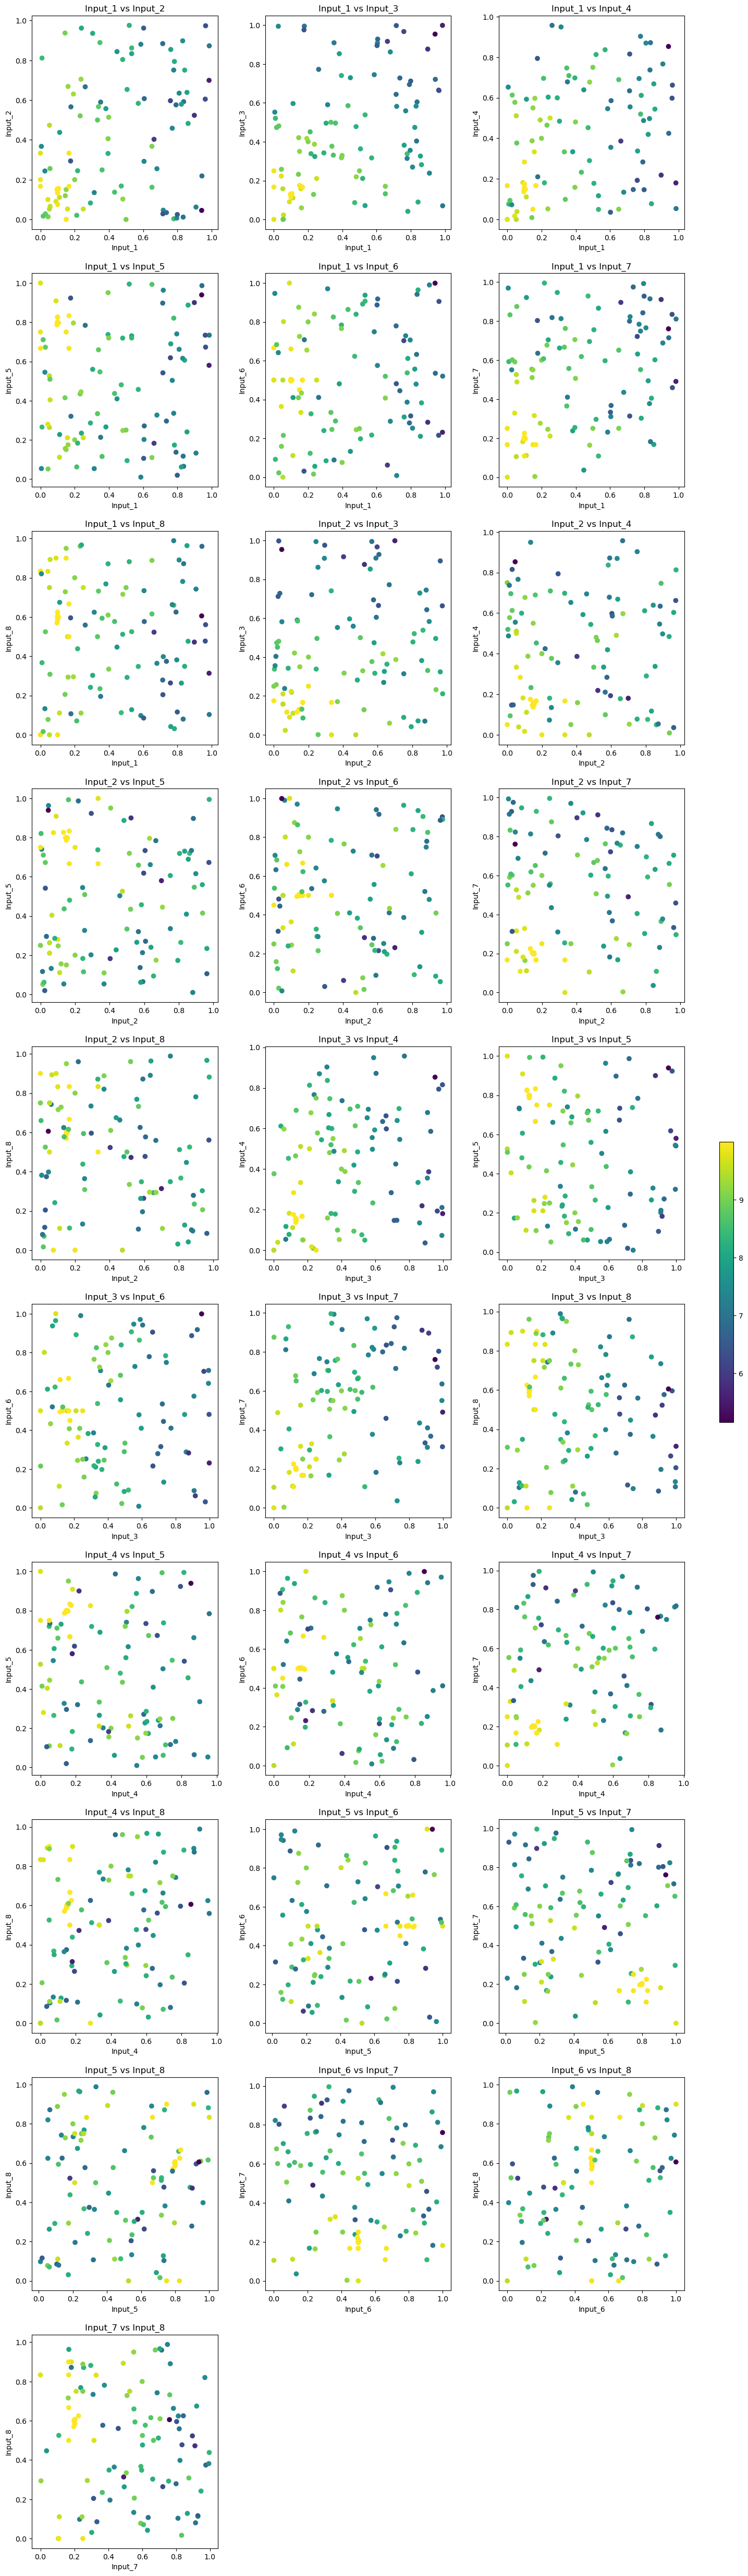

In [11]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

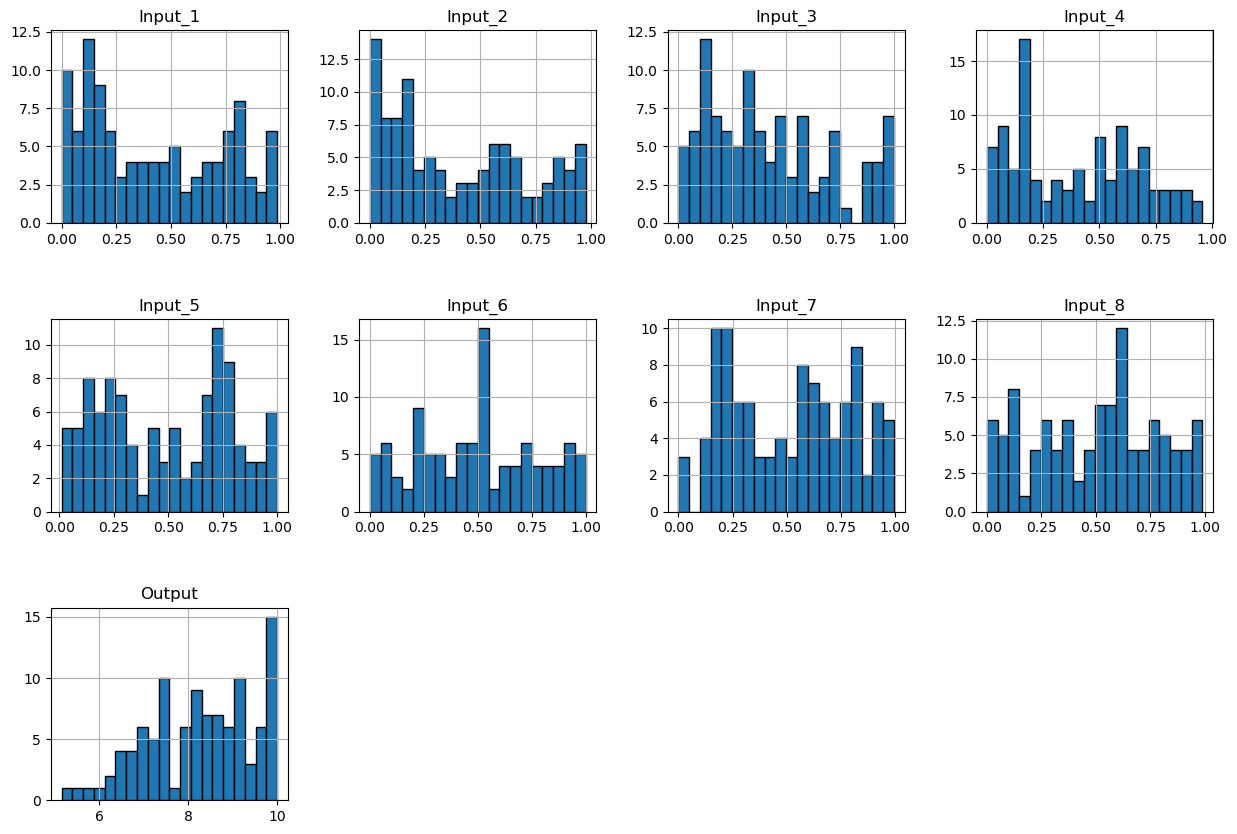

In [12]:
# Plot histograms for each column to understand distributions
df.hist(bins=20, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

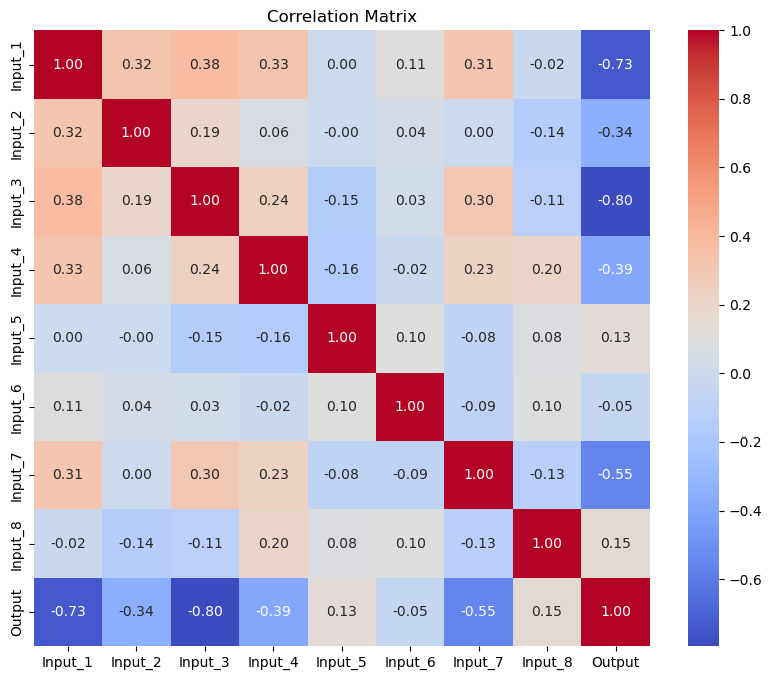

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

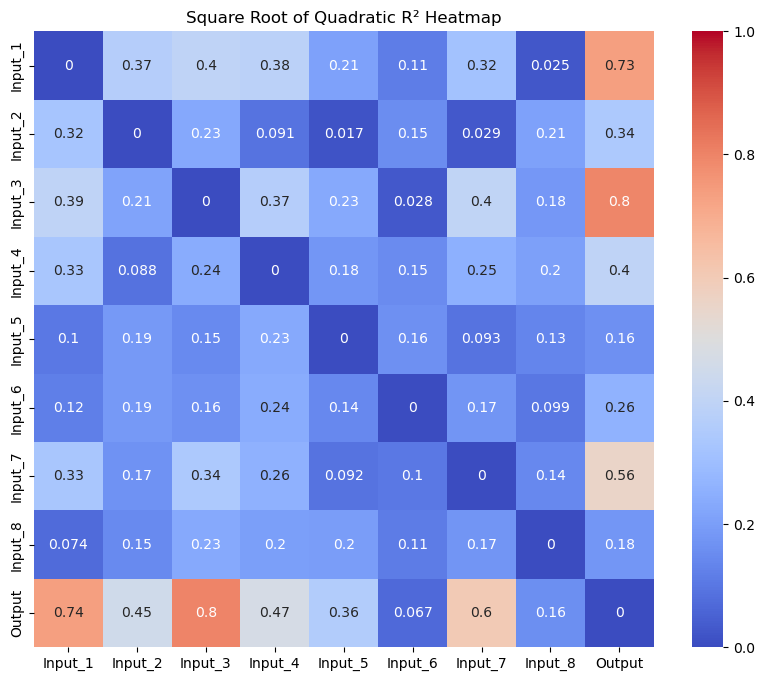

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


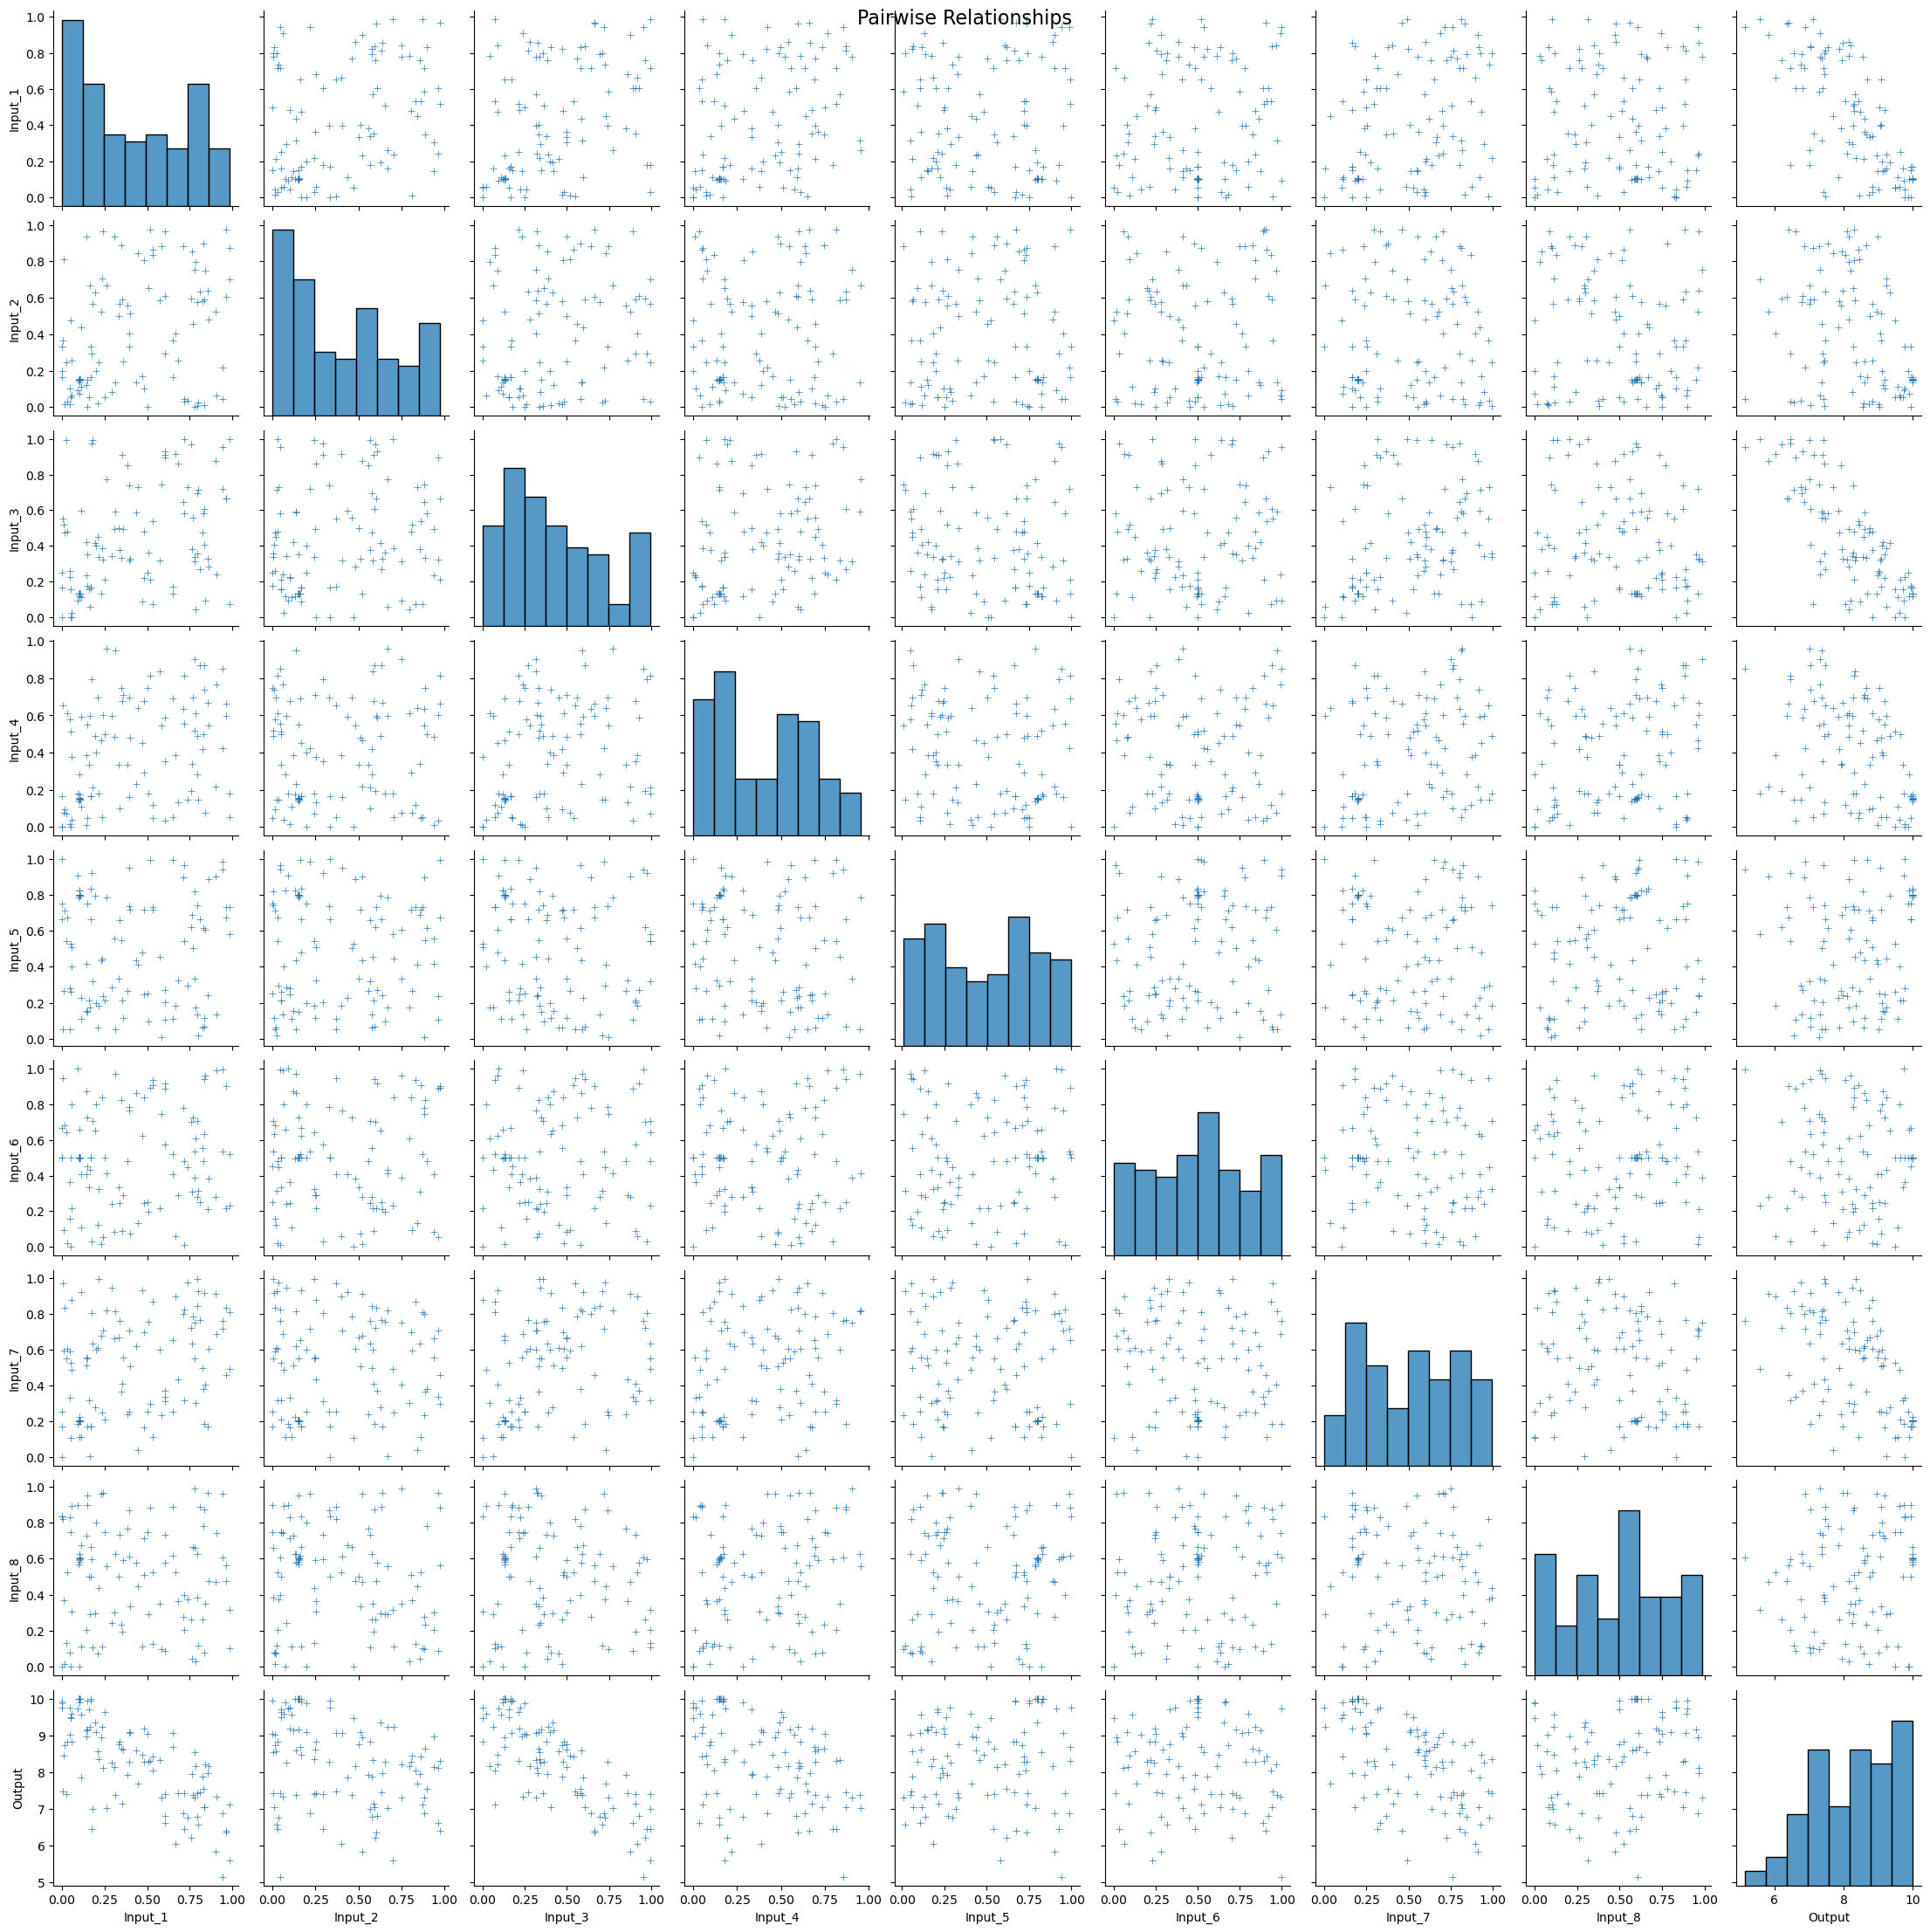

In [15]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

# History of query choices


# stud 544

#### 28 Apr. Ask 1. [0.150000-0.150000-0.350000-0.550000-0.150000-0.725000-0.550000-0.950000]
Con todas las variables
[0.050000-0.050000-0.050000-0.050000-0.500000-0.725000-0.500000-0.950000]
Corriedo sin inputs 6 y 8, corri todo y le agregue los valores del modelo completo para esos dos inputs
[0.150000-0.150000-0.350000-0.550000-0.150000-0.725000-0.550000-0.950000]

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.500000-0.000001-0.250000-0.750000-0.250000-0.250000-0.250000-0.750000]
- [0.150000-0.150000-0.350000-0.550000-0.150000-0.725000-0.550000-0.950000]

#### 10 MAy
Voy a volver a hacer lo mismo jugando con distingos inputs eliminados
- Current max: 0.056	0.065	0.022	0.038	0.403	0.801	0.488	0.893	Out 9.598

- Length .3
- Beta 2.6 [0.333334-0.500000-0.500000-0.333334-0.333334-0.333334-0.666666-0.500000]
- Length .2
- Beta 2.6 [0.200001-0.200001-0.400000-0.400000-0.200001-0.799999-0.600000-0.799999]
- Sin 3 inputs (4,6,8) y lenscale .2
- Beta 2.6 [0.157895-0.052632-0.157895-0.333333-0.210527-0.333333-0.315790-0.500000]***

#### 14 may
Inputs 1 y 3 son muy importantes. Se refuerza que 4,6 y 8 no
- Length .3
- Beta 2.6 [0.250000-0.250000-0.500000-0.500000-0.250000-0.500000-0.500000-0.750000]
- Length .2
- Beta 2.6 [0.500000-0.000001-0.250000-0.750000-0.250000-0.250000-0.250000-0.750000]
- Sin 3 inputs (4,6,8) y lenscale .2. Se agregan los lenght 3 para los inputs malos.
- Beta 2.6 [0.315790-0.052632-0.210527-0.500000-0.210527-0.500000-0.210527-0.750000]

**** Voy por el ultimo tantito modif [0.250000-0.052632-0.210527-0.500000-0.210527-0.500000-0.210527-0.750000]

#### 17 may
- Beta 1.96 [0.250000-0.250000-0.500000-0.500000-0.250000-0.500000-0.500000-0.750000] len .3
- Beta 2.6 [0.250000-0.000001-0.250000-0.500000-0.250000-0.500000-0.250000-0.750000] len .2
- Beta 2.6 sin Variables [0.052632-0.052632-0.157895-xxxx-0.263158-xxxx-0.526316-xxxx] len .2
- **** Log Likelihood process******
- Beta 1.96 [0.000001-0.20000-0.250000-0.000001-0.750000-0.500000-0.250000-0.000001]**NEw max
- Beta CERO [0.250000-0.250000-0.250000-0.250000-0.500000-0.500000-0.250000-0.250000]
- Beta 2.6 [0.250000-0.250000-0.000001-0.000001-0.750000-0.750000-0.000001-0.000001]
- ********Vamos por
- [0.052632-0.052632-0.157895-0.511111-0.263158-0.499999-0.526316-0.749999]
- [0.000001-0.200000-0.250000-0.000001-0.750000-0.500000-0.250000-0.000001] **NEw max

#### 1 JUN
- Log likelihood, sin dropear datos. Normal
- Beta 1.96 [0.000001-0.250000-0.250000-0.000001-0.999999-0.750000-0.250000-0.750000]
- Beta 2.6 [0.000001-0.250000-0.250000-0.000001-0.999999-0.500000-0.000001-0.999999]
- Log likelihood, sin dropear datos. CON DATOS ESCALADOS
- Beta 1.96 [0.000001-0.250000-0.000001-0.000001-0.999999-0.500000-0.000001-0.999999]
- Beta 2.6 [0.000001-0.500000-0.000001-0.000001-0.999999-0.500000-0.000001-0.999999]
- LOG LIKE, DATOS ESCALADOS Y GRID MAS AMPLIO
- Beta 1.96 [0.000001-0.333334-0.000001-0.000001-0.999999-0.500000-0.000001-0.833333]+
- Beta 2.6 [0.000001-0.333334-0.000001-0.000001-0.999999-0.500000-0.000001-0.999999]

- ******* VAMOS POR [0.000001-0.333334-0.000001-0.000001-0.999999-0.500000-0.000001-0.833333]

#### 7 jun
- Log likelihood con datos escalados
- Beta 1.96 [0.333334-0.166667-0.000001-0.000001-0.999999-0.000001-0.000001-0.000001]
- Beta CERO [0.166667-0.333334-0.166667-0.166667-0.666666-0.500000-0.166667-0.500000]++ **new max**
- Beta 2.6 [0.333334-0.000001-0.000001-0.000001-0.999999-0.000001-0.000001-0.000001]
- query EI: [0.999999-0.999999-0.999999-0.333334-0.666666-0.333334-0.999999-0.500000]
- query PI: [0.000001-0.166667-0.999999-0.833333-0.833333-0.000001-0.833333-0.500000]

- Log likelihood con datos escalados droppeando features
- Beta 1.96 [0.052632-0.473684-0.000001-0.526316-0.105264]&&
- Beta CERO [0.105264-0.315790-0.052632-0.631579-0.210527]
- Beta 2.6 [0.000001-0.578947-0.000001-0.473684-0.000001]
- query EI: [0.999999-0.999999-0.999999-0.684210-0.999999]
- query PI: [0.105264-0.263158-0.999999-0.842105-0.842105]
-     &&Beta 1.96 [0.052632-0.473684-0.000001-0.000001-0.526316-0.000001-0.105264-0.000001]+

- ******* VAMOS POR [0.052632-0.473684-0.000001-0.000001-0.526316-0.000001-0.105264-0.000001]+
y [0.166667-0.333334-0.166667-0.166667-0.666666-0.500000-0.166667-0.500000]++

#### 13 jujn
- Log likelihood con datos escalados
- Beta 1.96 [0.000001-0.000001-0.333334-0.000001-0.999999-0.999999-0.000001-0.999999]
- Beta CERO [0.000001-0.166667-0.166667-0.166667-0.666666-0.666666-0.166667-0.833333]+ **
- Beta 2.6 [0.000001-0.999999-0.000001-0.000001-0.000001-0.999999-0.000001-0.999999]
- ONLY std [0.999999-0.000001-0.999999-0.999999-0.999999-0.999999-0.000001-0.000001]
- query EI: [0.999999-0.999999-0.999999-0.333334-0.666666-0.333334-0.999999-0.500000]
- query PI: [0.000001-0.166667-0.999999-0.833333-0.833333-0.000001-0.833333-0.500000]

- Log likelihood con datos escalados droppeando features 6 y 8
- Beta 1.96 [0.000001-0.000001-0.000001-0.454546-0.999999-0.000001]
- Beta CERO [0.090910-0.090910-0.090910-0.181819-0.909090-0.181819] &&
- Beta 2.6 [0.000001-0.000001-0.000001-0.636363-0.999999-0.000001]
- ONLY std [0.000001-0.999999-0.000001-0.999999-0.000001-0.000001]

- **** Vamos por Beta Cero de total y de features parciales
- [0.000001-0.166667-0.166667-0.166667-0.666666-0.666666-0.166667-0.833333] ***muy cercando al max
- [0.090910-0.090910-0.090910-0.181819-0.909090-0.999999-0.181819-0.900000]

#### 18 jun

- todo el rango
Next query point UCB with Beta 1.96: [0.166667-0.000001-0.166667-0.333334-0.166667-0.333334-0.333334-0.500000]
Next query point UCB with Beta 0.01: [0.166667-0.333334-0.166667-0.166667-0.666666-0.500000-0.166667-0.500000]

- todo el rango larger length range
Next query point UCB with Beta 1.96: [0.166667-0.000001-0.166667-0.333334-0.833333-0.666666-0.000001-0.000001]
Next query point UCB with Beta 0.01: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.500000]

- rango acotado
Next query point UCB with Beta 1.96: [0.000001-0.150001-0.175001-0.166667-0.641667-0.675000-0.166667-0.816667]
Next query point UCB with Beta 0.01: [0.000001-0.150001-0.175001-0.166667-0.641667-0.675000-0.166667-0.816667]

-rango acotado larger length
Next query point UCB with Beta 1.96: [0.150001-0.000001-0.175001-0.050001-0.750000-0.450001-0.166667-0.900000]++ ***new max
Next query point UCB with Beta 0.01: [0.100001-0.150001-0.116667-0.166667-0.750000-0.525000-0.166667-0.566667]

- *** Vamos por [0.150001-0.000001-0.175001-0.050001-0.750000-0.450001-0.166667-0.900000]

#### 22 jun
- Todo el rango
Next query point UCB with Beta 1.96: [0.166667-0.000001-0.166667-0.333334-0.833333-0.666666-0.166667-0.000001]
Next query point UCB with Beta 0.01: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.500000]
Next query point UCB with Beta 1.0: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.500000]

- rango acotado
Next query point UCB with Beta 1.96: [0.100001-0.075001-0.116667-0.283334-0.825000-0.660000-0.108334-0.000001]++
Next query point UCB with Beta 0.01: [0.100001-0.150001-0.116667-0.166667-0.825000-0.495000-0.166667-0.495000]
Next query point UCB with Beta 1.0: [0.100001-0.150001-0.116667-0.108334-0.825000-0.495000-0.225000-0.495000]

- ** Vamos por[0.100001-0.075001-0.116667-0.283334-0.825000-0.660000-0.108334-0.000001]

#### 24 jun

- Todo el rango
Next query point UCB with Beta 1.96: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.500000]
Next query  Beta 0.01: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.666666] **cerca del max
Next query point UCB with Beta 1.0: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.666666]
Next query point UCB with Beta 2.6: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.500000]

- rango acotado
Next query point UCB with Beta 1.96: [0.100001-0.133334-0.116667-0.175001-0.826667-0.495001-0.225000-0.560000]
Next query point Beta 0.01: [0.100001-0.133334-0.116667-0.175001-0.826667-0.495001-0.225000-0.625000] ** new max
Next query point UCB with Beta 1.0: [0.100001-0.133334-0.116667-0.175001-0.826667-0.495001-0.225000-0.560000]
Next query point UCB with Beta 2.6: [0.100001-0.133334-0.116667-0.175001-0.826667-0.495001-0.225000-0.560000]
Next query point UCB with Beta 4: [0.100001-0.133334-0.116667-0.116667-0.908333-0.495001-0.225000-0.495001]

- +++ Vamos por [0.100001-0.133334-0.116667-0.175001-0.826667-0.495001-0.225000-0.625000] y [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.666666]

#### 28 jun

- Todo el rango
Next query point UCB with Beta 1.96: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.500000]
Next query point UCB with Beta 0.01: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.666666]
Next query point UCB with Beta 1.0: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.666666]
Next query point UCB with Beta 2.6: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.500000]
Next query point UCB with Beta 4: [0.166667-0.166667-0.166667-0.166667-0.833333-0.500000-0.166667-0.999999]

- Rango acotado
Next query point UCB with Beta 1.96: [0.096667-0.150001-0.130001-0.136667-0.786667-0.500000-0.196667-0.553334]
Next query point UCB with Beta 0.01: [0.096667-0.150001-0.130001-0.136667-0.786667-0.500000-0.196667-0.620000] 
Next query point UCB with Beta 1.0: [0.096667-0.150001-0.130001-0.136667-0.786667-0.500000-0.196667-0.586667]
Next query point UCB with Beta 2.6: [0.096667-0.150001-0.130001-0.136667-0.820001-0.500000-0.196667-0.553334]
Next query point UCB with Beta 4: [0.096667-0.150001-0.130001-0.136667-0.820001-0.500000-0.196667-0.520001]

- Rango mas acotado (10 de rango)
Next query point UCB 1.96: [0.096667-0.150001-0.130000-0.136600-0.786667-0.500001-0.196600-0.570001] +cerca max
Next query point UCB 0.01: [0.100000-0.150001-0.130000-0.156667-0.796667-0.500001-0.200000-0.603334] ++ **new max
Next query point UCB with Beta 1.0: [0.100000-0.150001-0.130000-0.156667-0.796667-0.500001-0.200000-0.586668]
Next query point UCB with Beta 2.6: [0.100000-0.150001-0.130000-0.140000-0.796667-0.500001-0.200000-0.570001]
Next query point UCB with Beta 4: [0.100000-0.133334-0.130000-0.140000-0.813333-0.500001-0.200000-0.570001]

- *** Vampos por [0.096667-0.150001-0.130000-0.136600-0.786667-0.500001-0.196600-0.570001] y [0.100000-0.150001-0.130000-0.156667-0.796667-0.500001-0.200000-0.603334]

#### 1 jul

- RAngo acotado

Next query point UCB with Beta 1.96: [0.105715-0.144286-0.132858-0.148572-0.805715-0.500001-0.197143-0.580001]
Next query point UCB with Beta 0.01: [0.105715-0.155715-0.132858-0.148572-0.797144-0.500001-0.197143-0.600000] + 
Next query point UCB with Beta 1.0: [0.105715-0.144286-0.132858-0.148572-0.797144-0.500001-0.197143-0.590000]
Next query point UCB with Beta 2.6: [0.094286-0.144286-0.132858-0.148572-0.805715-0.500001-0.197143-0.570001]
Next query point UCB with Beta 4: [0.094286-0.144286-0.132858-0.137143-0.805715-0.500001-0.197143-0.550001]

- Ex inputs
    Datos ex Inputs 5 y 6
    Next query point UCB with Beta 1.96: [0.050001-0.100001-0.180000-0.090001-xxxxxx-xxxxxx-0.150001-0.570001]
    Next query point UCB with Beta 0.01: [0.050001-0.100001-0.180000-0.121580-xxxxxx-xxxxxx-0.150001-0.570001]

    Datos ex Inputs 5 y 8
    Next query point UCB with Beta 1.96: [0.060527-0.184211-0.164211-0.090001-xxxxxx-0.550000-0.150001-xxxxxx]
    Next query point UCB with Beta 0.01: [0.071053-0.184211-0.153684-0.090001-xxxxxx-0.550000-0.165790-xxxxxx]
    
    Datos ex Inputs 6 y 8
    Next query point UCB with Beta 1.96: [0.144737-0.100001-0.180000-0.095264-0.830000-xxxxxx-0.150001-xxxxxx]
    Next query point UCB with Beta 0.01: [0.118421-0.110527-0.174737-0.153158-0.819474-xxxxxx-0.150001-xxxxxx]

- *** Vamos por [0.105715-0.155715-0.132858-0.148572-0.797144-0.500001-0.197143-0.600000]

#### 6 jul
- Rango grande
Next query point UCB with Beta 0.01: [0.100000-0.153750-0.130001-0.153750-0.800001-0.503750-0.203750-0.607500]
Next query point UCB with Beta 1.0: [0.100000-0.145001-0.130001-0.153750-0.800001-0.503750-0.203750-0.596250]
Next query point UCB with Beta 1.96: [0.100000-0.145001-0.130001-0.145001-0.800001-0.503750-0.203750-0.585001] +
Next query point UCB with Beta 2.6: [0.100000-0.145001-0.130001-0.145001-0.800001-0.503750-0.203750-0.573751]
Next query point UCB with Beta 4: [0.100000-0.145001-0.130001-0.145001-0.807500-0.503750-0.203750-0.540001]

- ** vamos por [0.100000-0.145001-0.130001-0.145001-0.800001-0.503750-0.203750-0.585001]

#### 9 jul
Next query point UCB with Beta 0.01: [0.100000-0.153750-0.130001-0.153750-0.800001-0.503750-0.203750-0.607500]++
Next query point UCB with Beta 1.0: [0.100000-0.153750-0.130001-0.153750-0.800001-0.503750-0.203750-0.596250]
Next query point UCB with Beta 1.96: [0.100000-0.145001-0.130001-0.153750-0.800001-0.503750-0.203750-0.585001]
Next query point UCB with Beta 2.6: [0.100000-0.145001-0.130001-0.145001-0.800001-0.503750-0.203750-0.573751]
Next query point UCB with Beta 4: [0.100000-0.145001-0.130001-0.145001-0.807500-0.503750-0.203750-0.551251]

- ** Vamos por [0.100000-0.153750-0.130001-0.153750-0.800001-0.503750-0.203750-0.607500]

#### 13 jul
Next query point UCB with Beta 0.01: [0.100000-0.150001-0.130000-0.150001-0.800001-0.500001-0.201250-0.605000]
Next query point UCB with Beta 1.0: [0.100000-0.150001-0.130000-0.150001-0.800001-0.500001-0.201250-0.597500]
Next query point UCB with Beta 1.96: [0.100000-0.150001-0.130000-0.150001-0.800001-0.500001-0.201250-0.590000]++ **new max
Next query point UCB with Beta 2.6: [0.100000-0.150001-0.130000-0.150001-0.800001-0.500001-0.201250-0.582501]

- ** Vampos por [0.100000-0.150001-0.130000-0.150001-0.800001-0.500001-0.201250-0.590000]

#### 15 jul
#df.loc[len(df)]=[0.1,0.150001,0.13,0.156667,0.796667,0.500001,0.20000,0.603334,9.9999488851089] #** max
#df.loc[len(df)]=[0.1,0.150001,0.13,0.150001,0.800001,0.500001,0.20125,0.590000,9.9999868749965] #**max

Next query point UCB with Beta 0.01: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.600000]
Next query point UCB with Beta 1.0: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.595000] ++
Next query point UCB with Beta 1.96: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.590000] 
Next query point UCB with Beta 2.6: [0.100000-0.146250-0.130000-0.150000-0.800000-0.500000-0.200000-0.580000]

- ** Vamos por [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.595000]

#### 20 jul
Next query point UCB with Beta 0.01: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.600000] ++
Next query point UCB with Beta 1.0: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.595000]
Next query point UCB with Beta 1.96: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.590000]
Next query point UCB with Beta 2.6: [0.100000-0.146250-0.130000-0.150000-0.800000-0.500000-0.200000-0.585000]

- ** vampos por [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.600000]

# New model / with batch loop for prediction

In [26]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

# Define custom ranges for each input
input_ranges = [
    (0.085000, 0.115000),  # Range for Input_1
    (0.135000, 0.165000),  # Range for Input_2
    (0.115000, 0.145000),   # Range for Input_3
    (0.135000, 0.165000),   # Range for Input_4
    (0.785000, 0.815000),   # Range for Input_5
    (0.485000, 0.515000),   # Range for Input_6
    (0.185000, 0.215000),   # Range for Input_7
    (0.580000, 0.620000)   # Range for Input_8
]

#df.loc[len(df)]=[0.1,0.150001,0.13,0.156667,0.796667,0.500001,0.2,0.603334,9.9999488851089] #** max
#df.loc[len(df)]=[0.1,0.150001,0.13,0.150001,0.800001,0.500001,0.20125,0.59,9.9999868749965] #**max

# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

GG = 9  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

print("Grid done")

# Batch size for predictions
batch_size = 1000  # Adjust this size based on your memory capacity

# Predictions using the surrogate model in batches
mean_scaled_list = []
std_scaled_list = []

for i in range(0, X_grid_scaled.shape[0], batch_size):
    batch_end = i + batch_size
    X_batch = X_grid_scaled[i:batch_end]
    mean_batch, std_batch = GPR_model_best.predict(X_batch, return_std=True)
    mean_scaled_list.append(mean_batch)
    std_scaled_list.append(std_batch)

# Concatenate all batches
mean_scaled = np.concatenate(mean_scaled_list, axis=0).reshape(-1, 1)
std_scaled = np.concatenate(std_scaled_list, axis=0)

# Inverse transform the mean predictions
mean = scaler_y.inverse_transform(mean_scaled).flatten()
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 0.01', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([1.00,1.96, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")


Best length scale: 0.4025397652011556
Best noise level: 1e-12
Grid done
Next query point UCB with Beta 0.01: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.600000]
Next query point UCB with Beta 1.0: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.595000]
Next query point UCB with Beta 1.96: [0.100000-0.150000-0.130000-0.150000-0.800000-0.500000-0.200000-0.590000]
Next query point UCB with Beta 2.6: [0.100000-0.146250-0.130000-0.150000-0.800000-0.500000-0.200000-0.585000]
Next query point UCB with Beta 4: [0.100000-0.146250-0.130000-0.146250-0.803750-0.500000-0.200000-0.580000]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


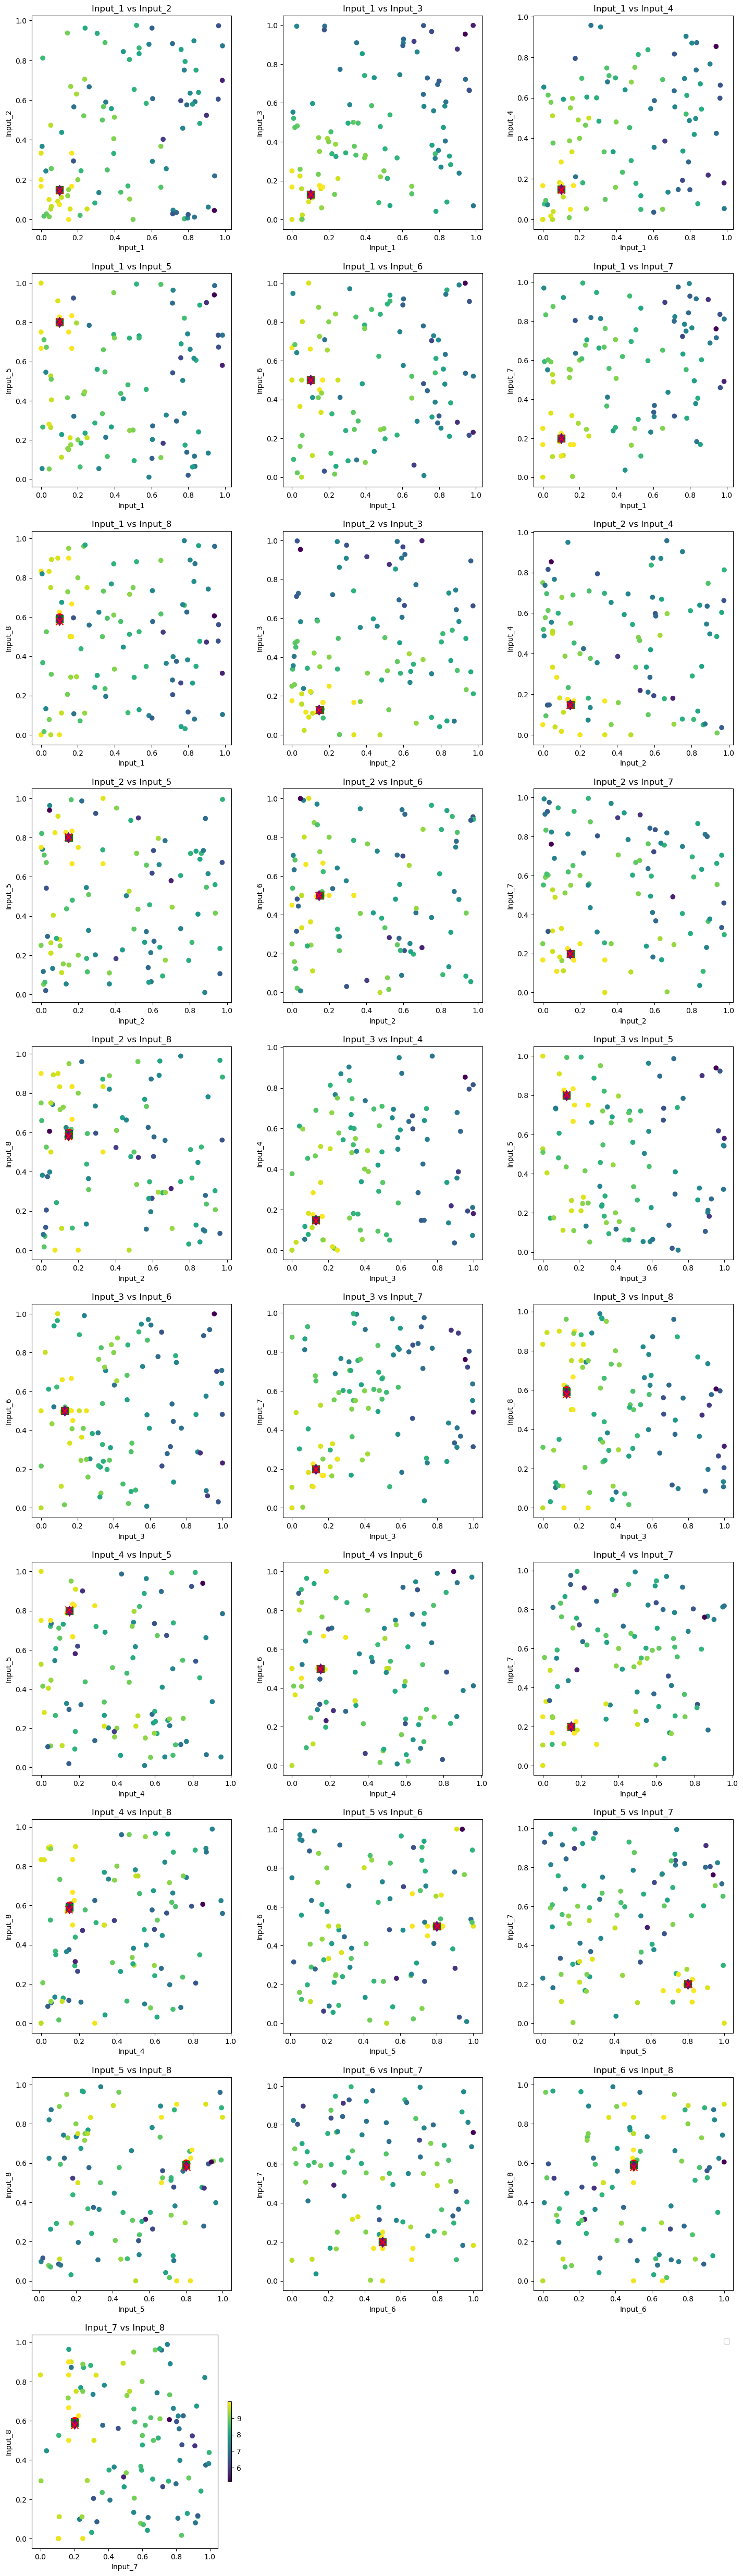

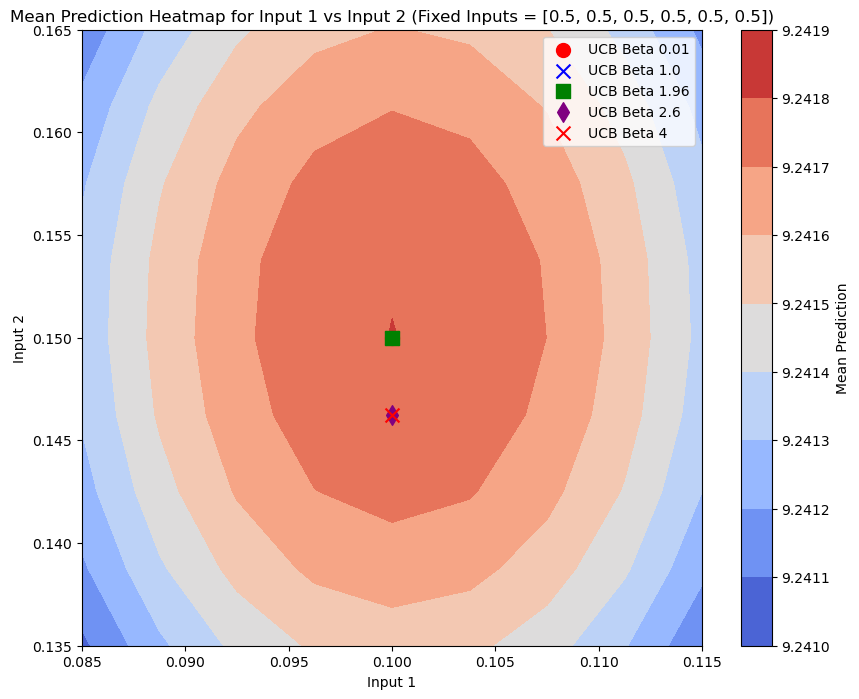

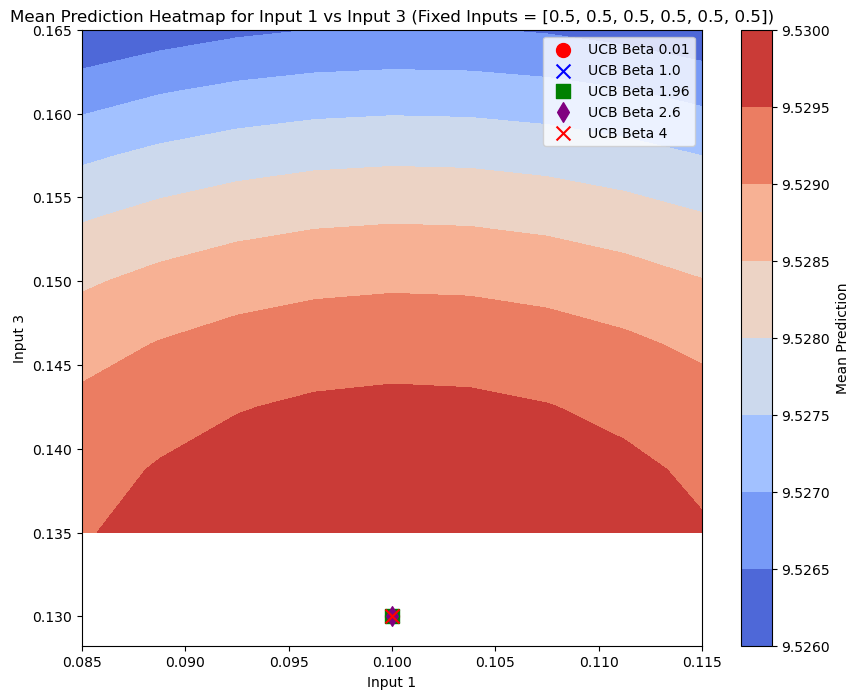

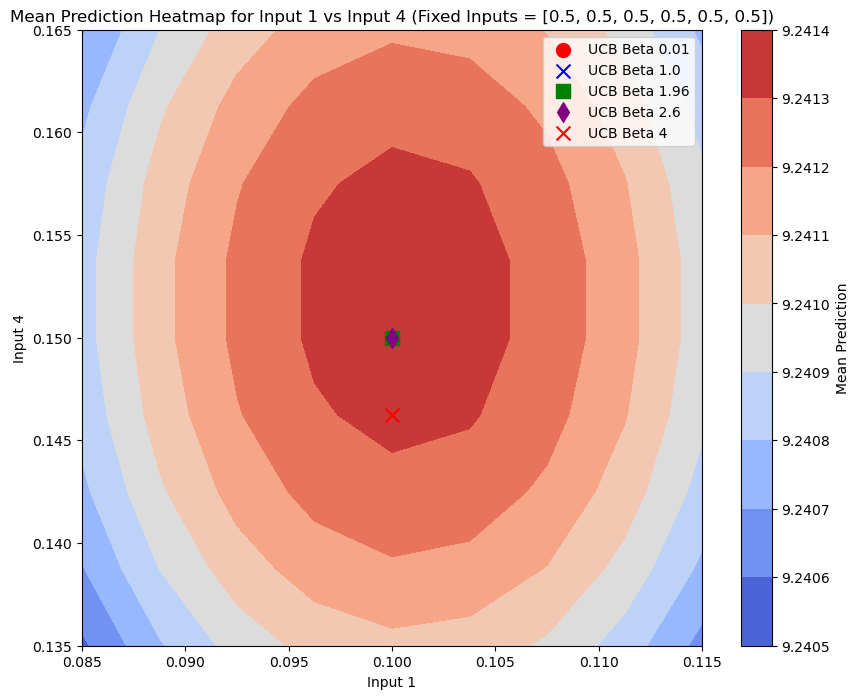

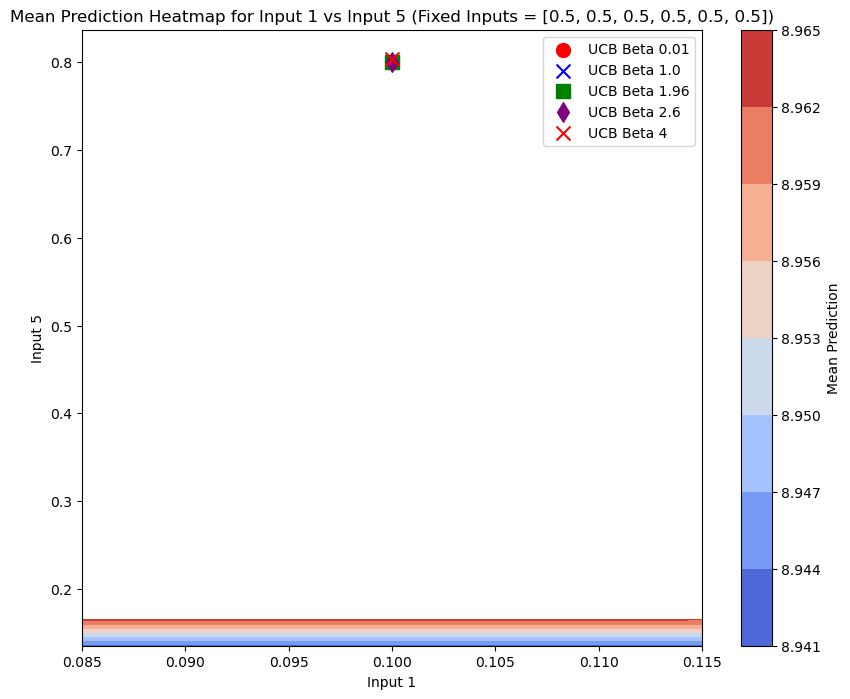

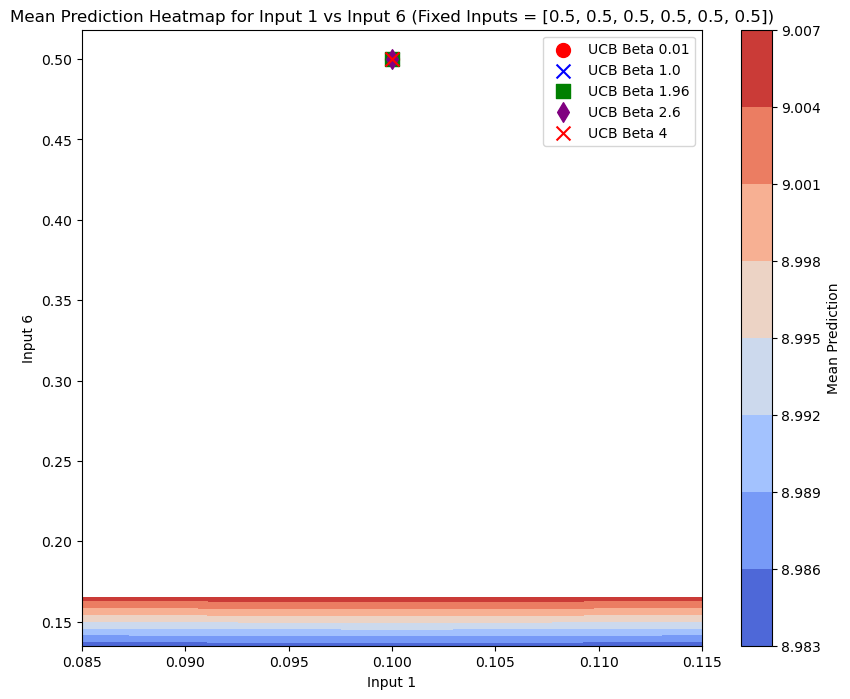

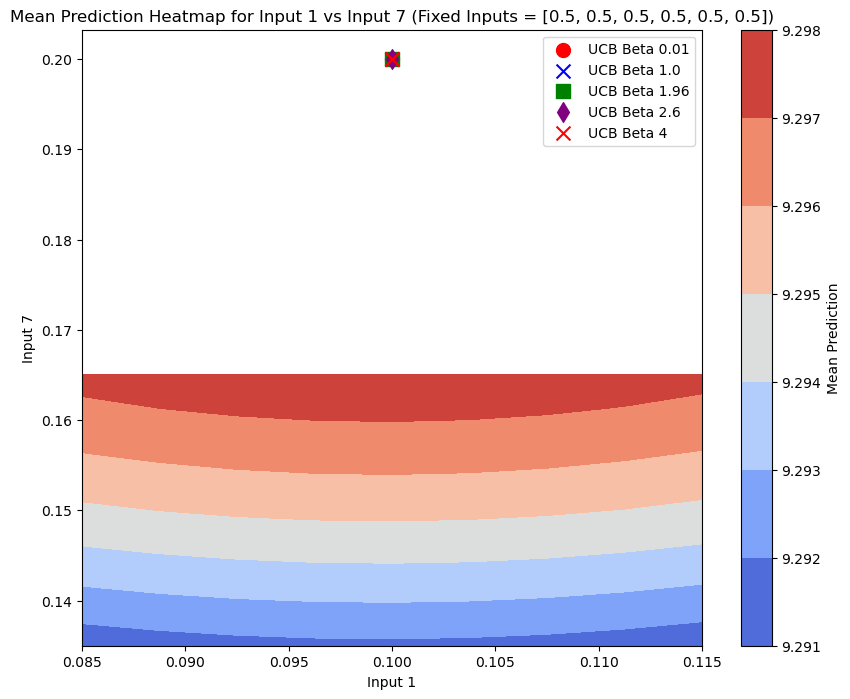

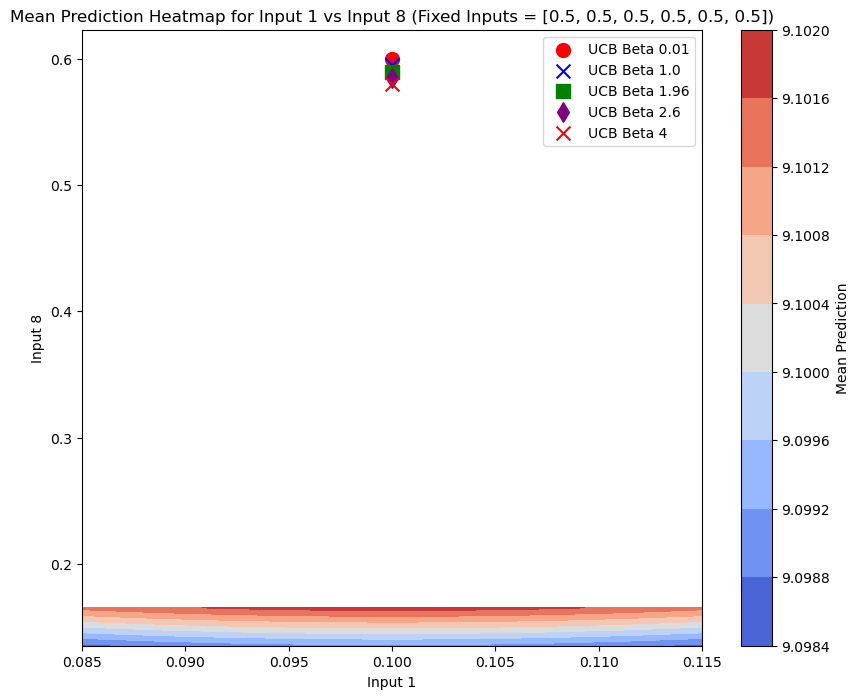

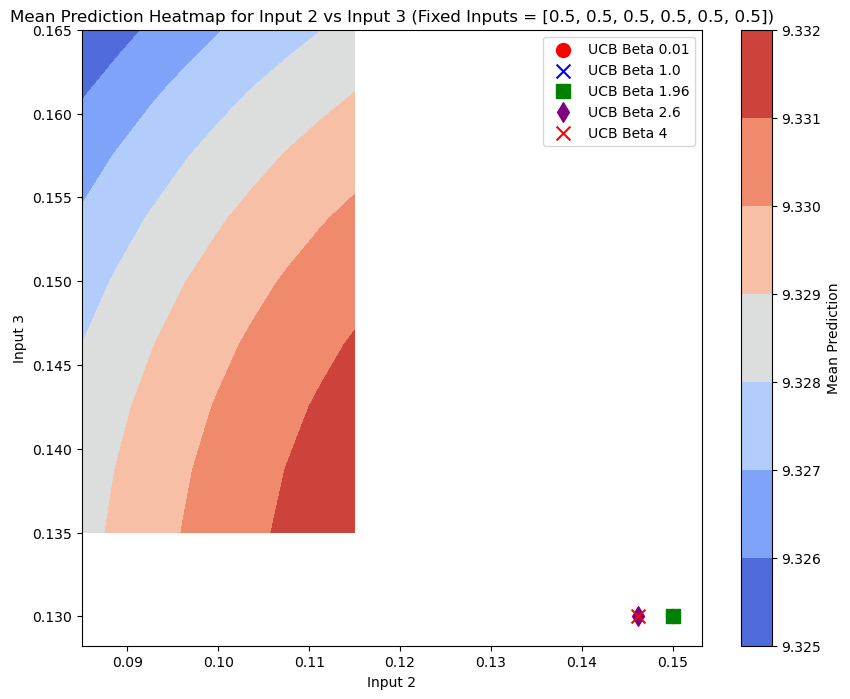

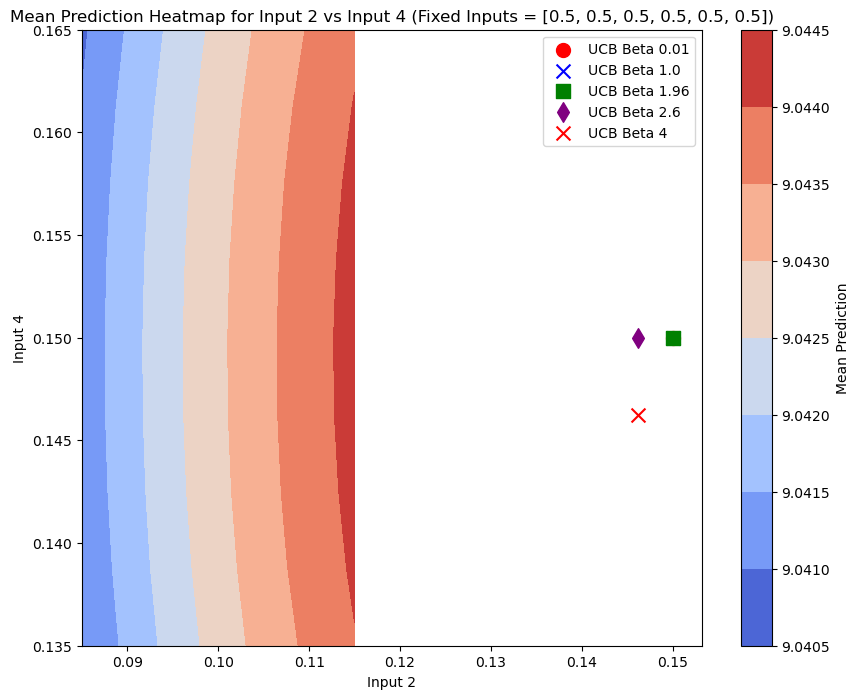

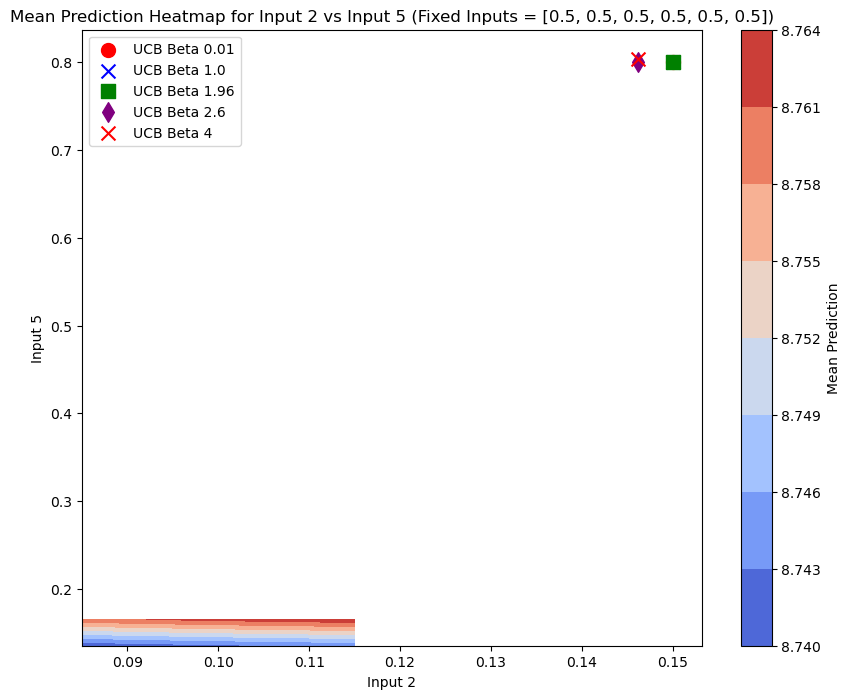

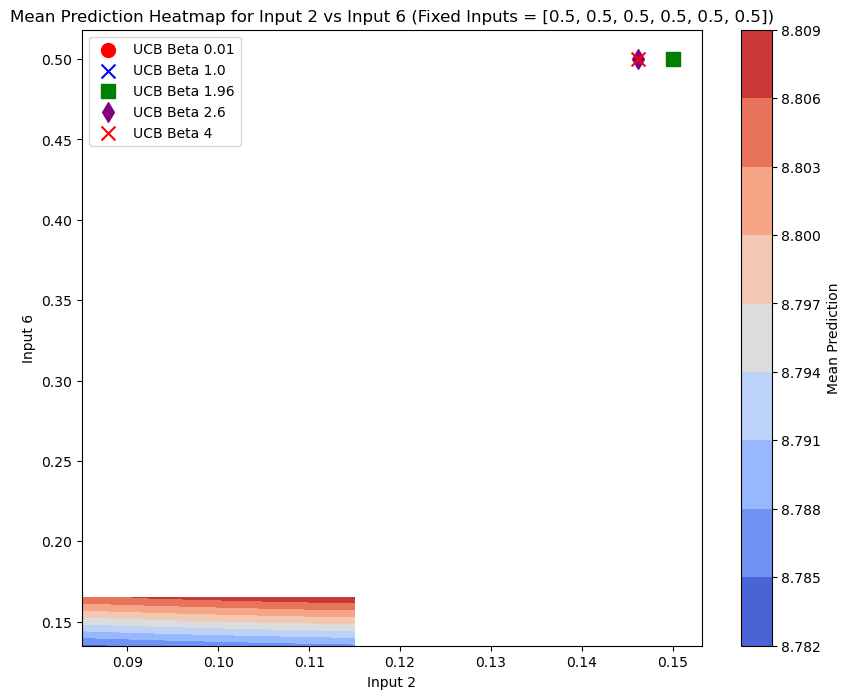

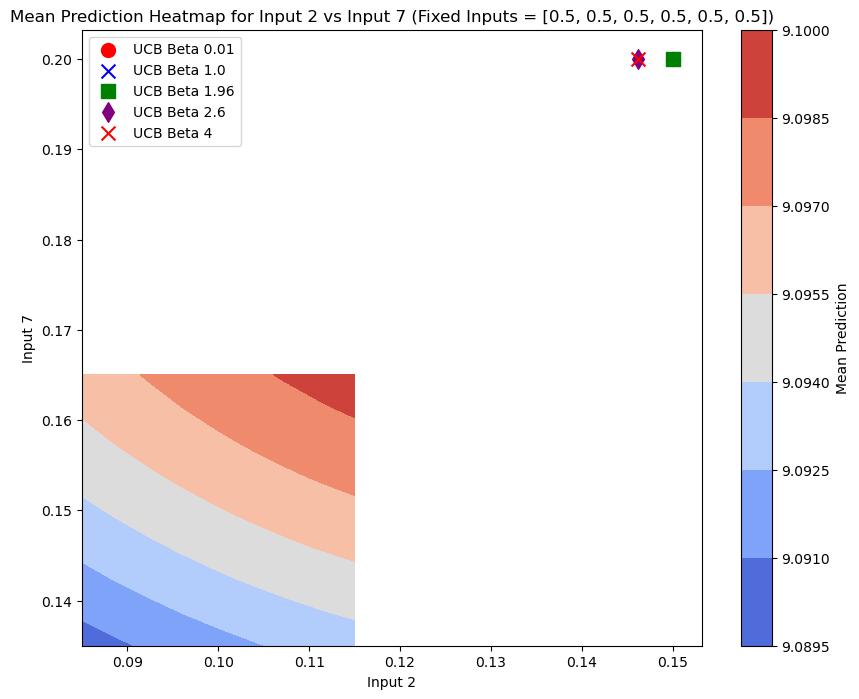

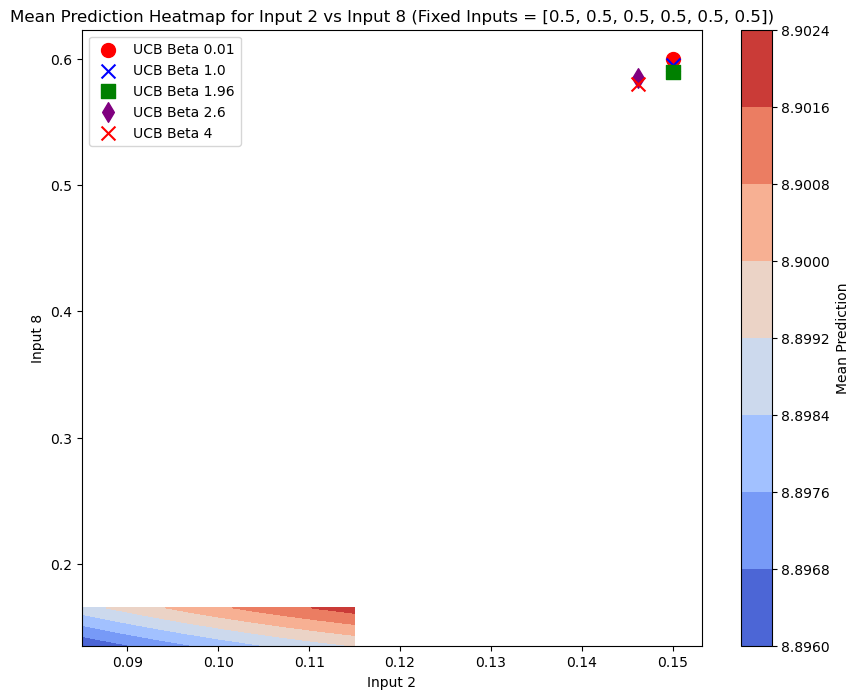

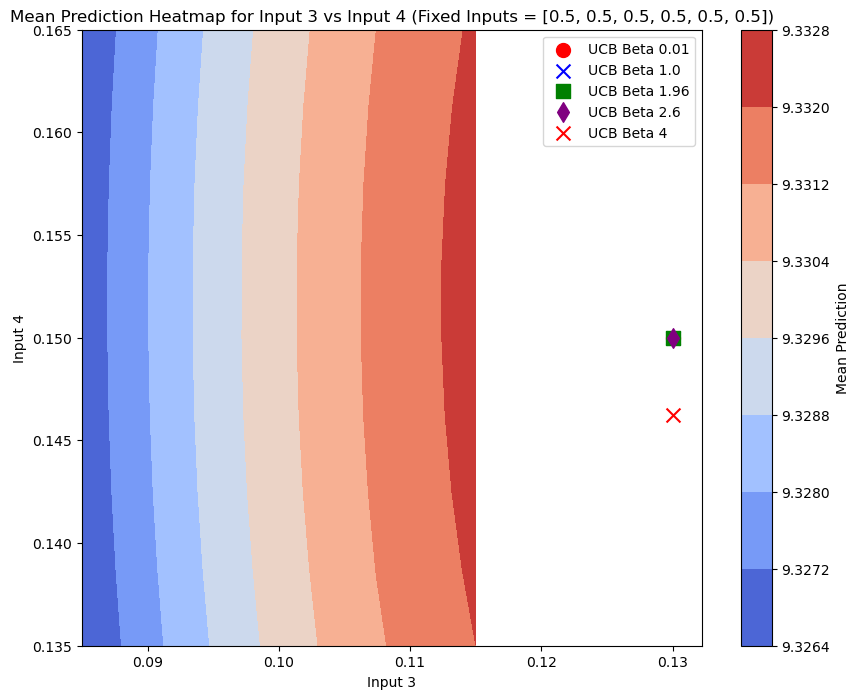

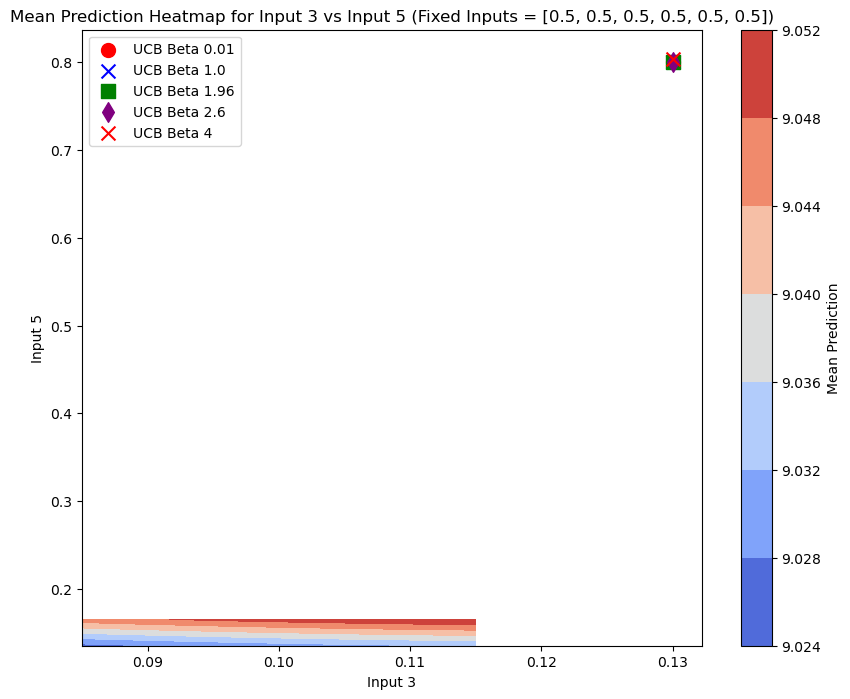

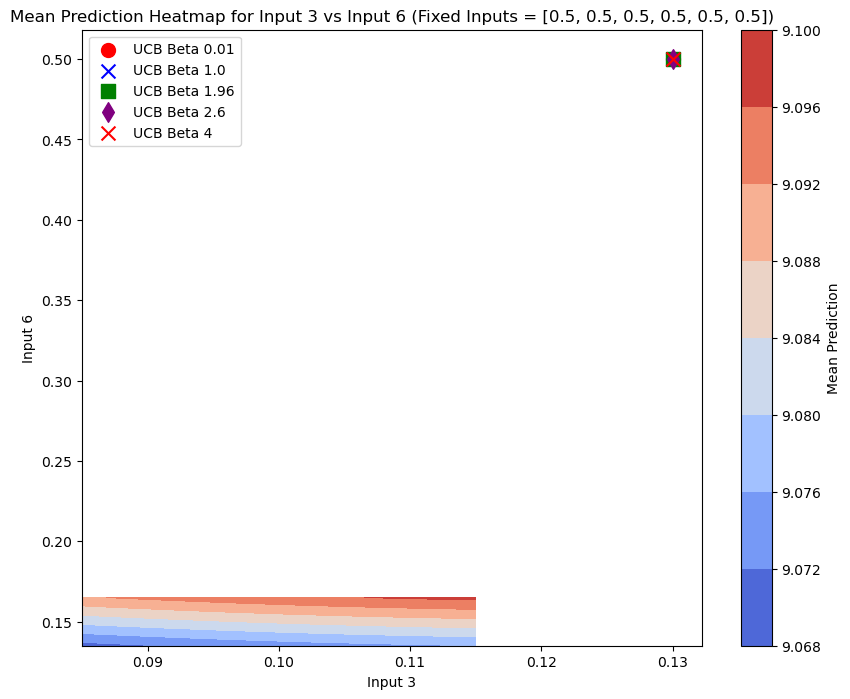

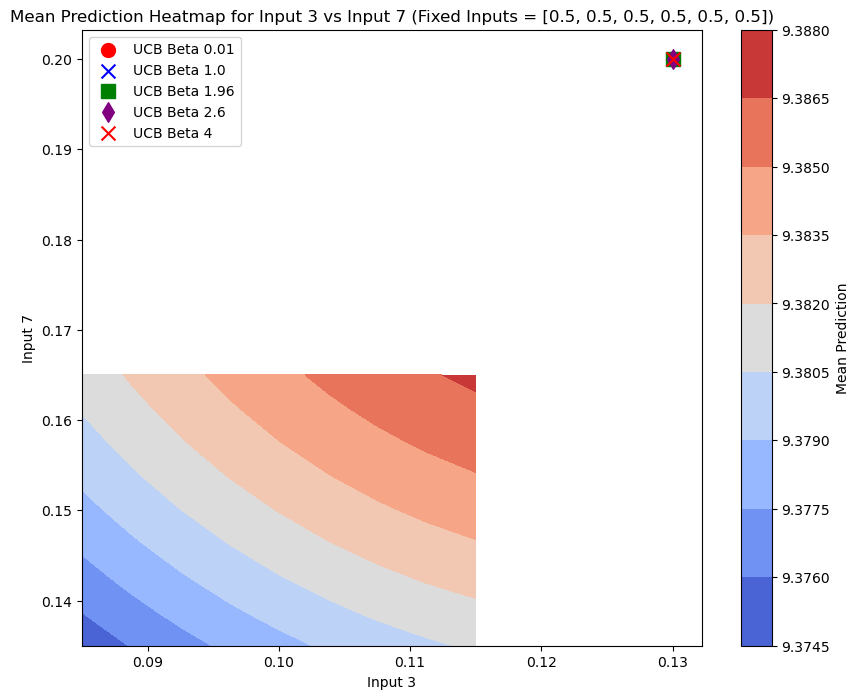

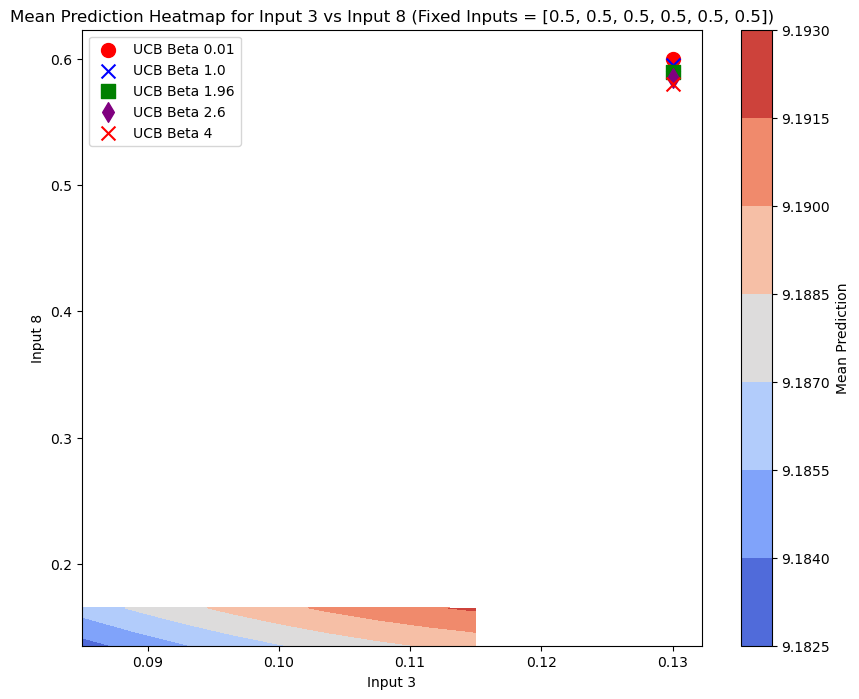

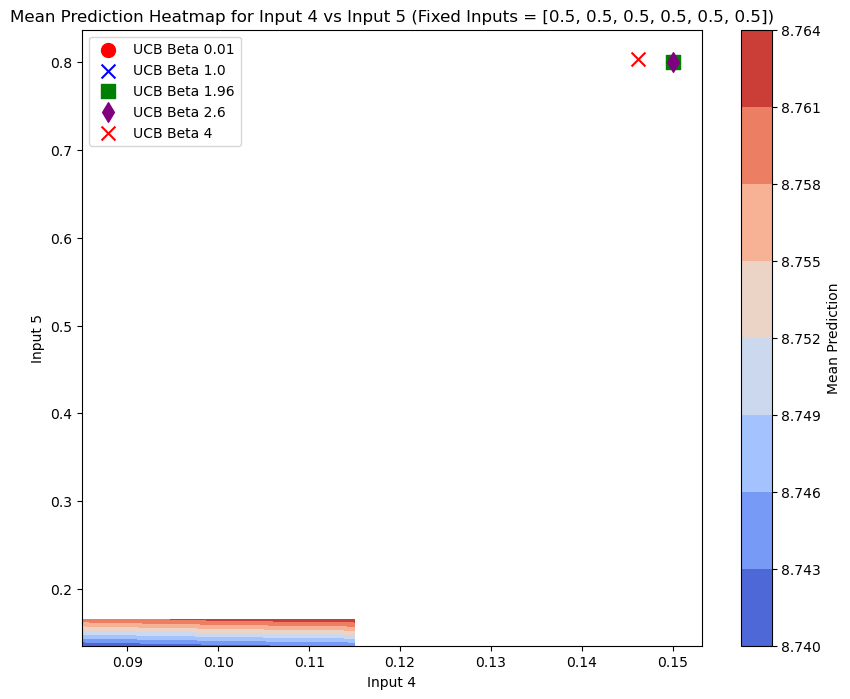

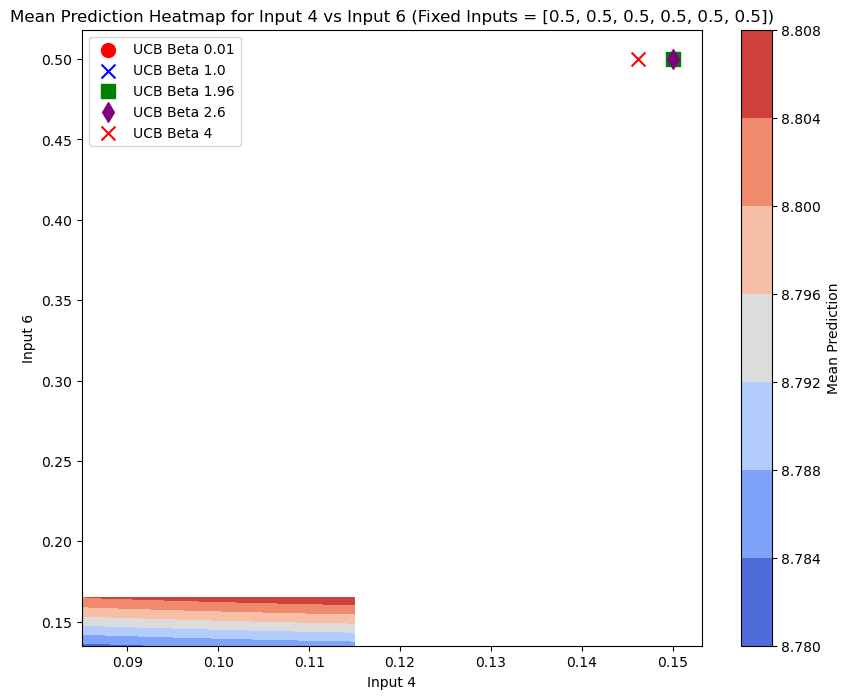

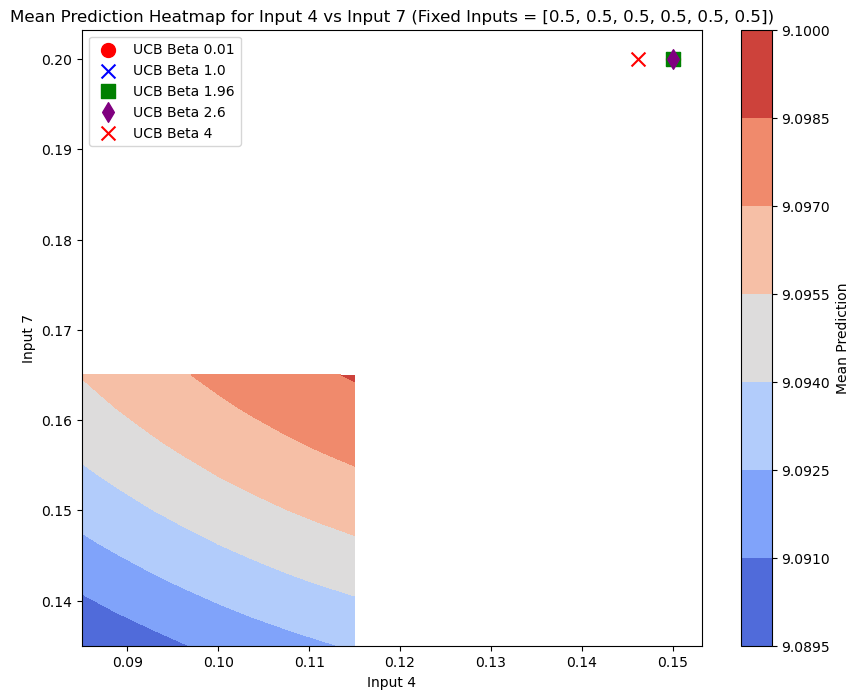

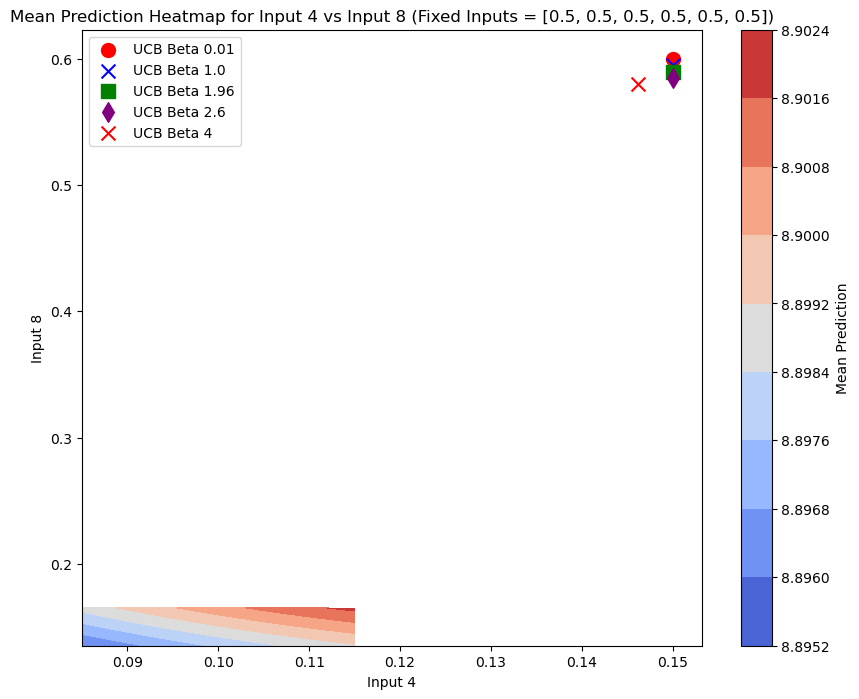

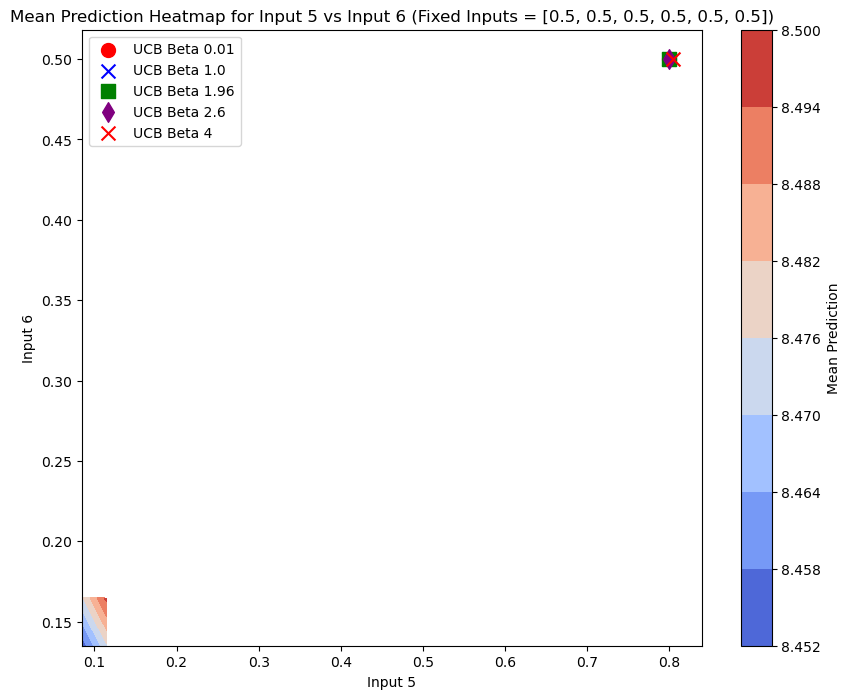

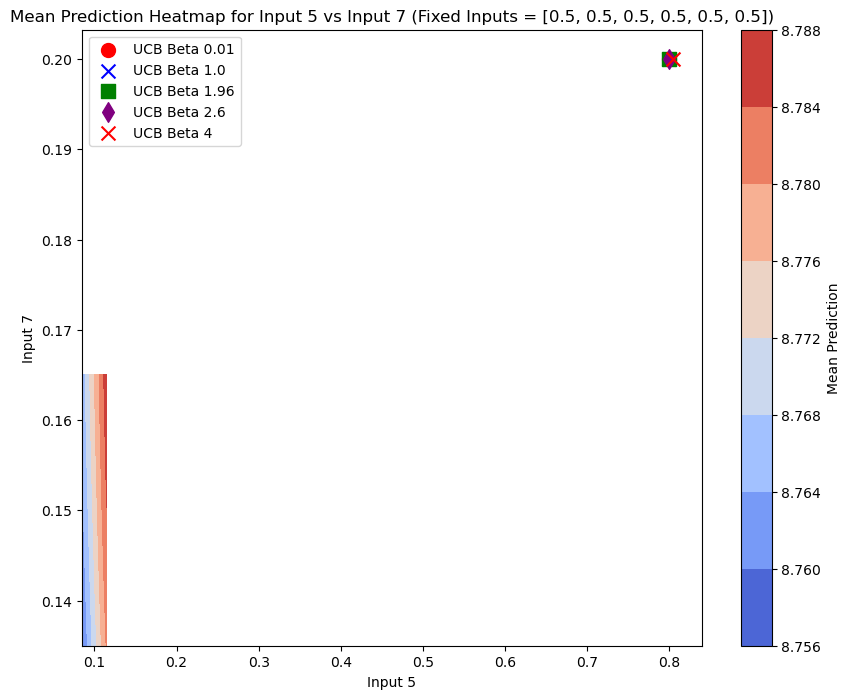

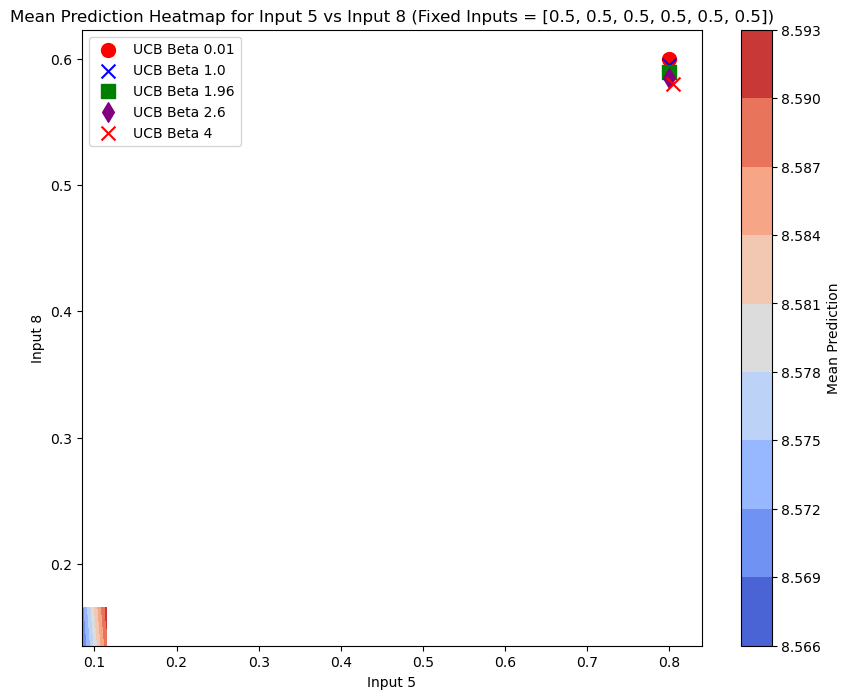

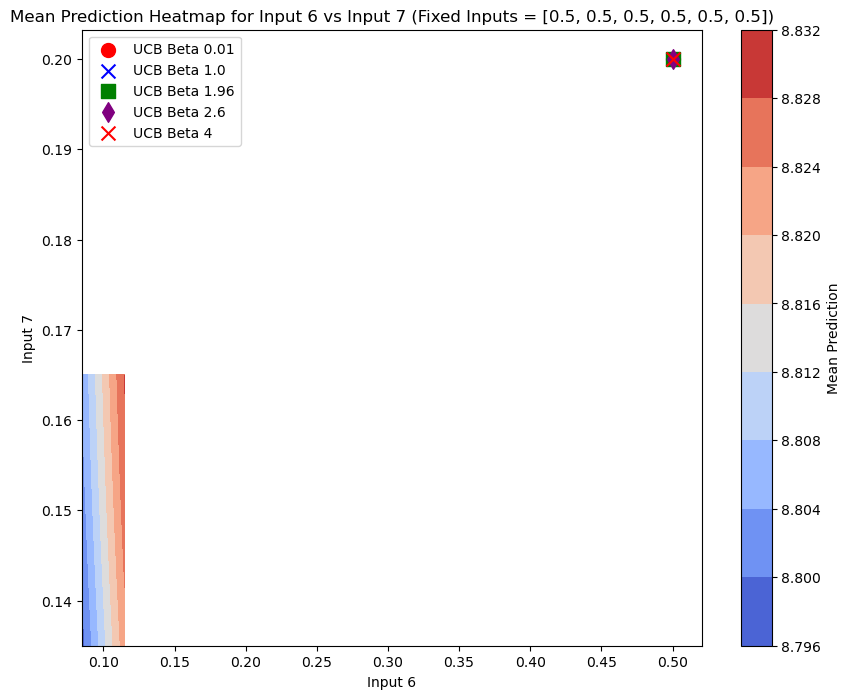

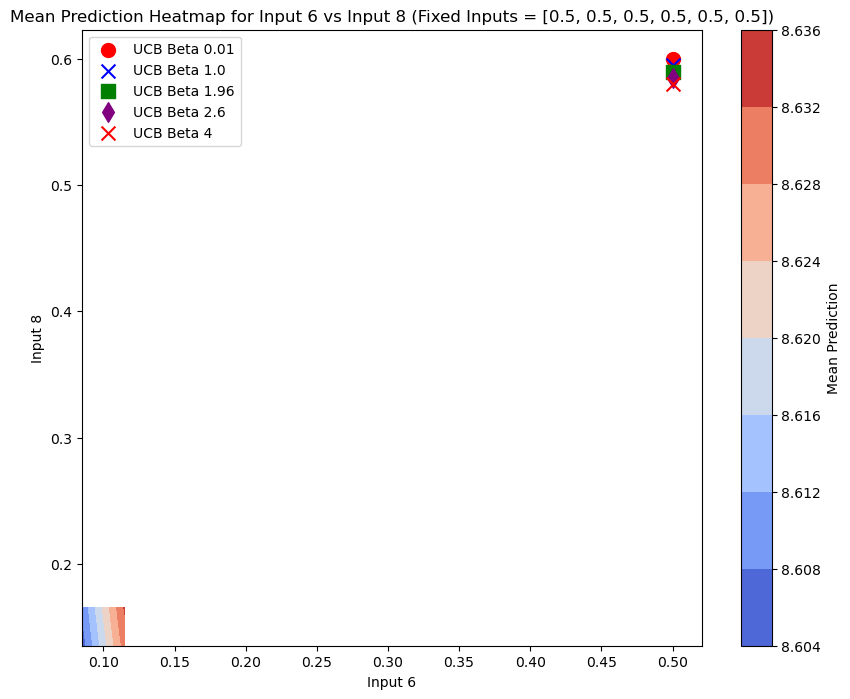

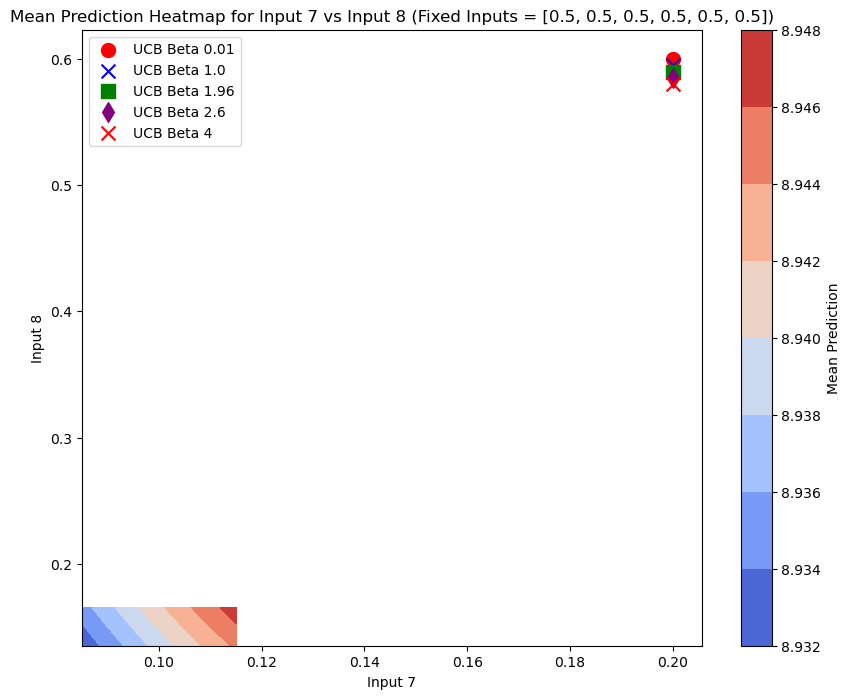

In [28]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)

# Running with input reduction. Inputs 5,6 and 8 in pairs

In [ ]:
print("Datos ex Inputs 5 y 6")

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Input_5','Input_6','Output'])
#X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),
    (0.000001, 0.999999), 
    (0.000001, 0.999999), 
    (0.000001, 0.999999),  
    (0.000001, 0.999999),  
    (0.000001, 0.999999)  
    # Add more ranges for additional inputs if necessary
]


#PAra rangos finos, comentar si no lo queremos
si=1
if si==1:
# Define custom ranges for each input
    input_ranges = [
        (0.000001, 0.160000),  # Range for Input_1
        (0.050001, 0.190000),  # Range for Input_2
        (0.110001, 0.190000),   # Range for Input_3
        (0.080001, 0.170000),   # Range for Input_4
        (0.760001, 0.850000),   # Range for Input_5
        (0.470001, 0.580000),   # Range for Input_6
        (0.130001, 0.220000),   # Range for Input_7
        (0.550001, 0.620000)   # Range for Input_8
    ]

 
    
# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 20  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

print("Grid done")

# Batch size for predictions
batch_size = 1000  # Adjust this size based on your memory capacity

# Predictions using the surrogate model in batches
mean_scaled_list = []
std_scaled_list = []

for i in range(0, X_grid_scaled.shape[0], batch_size):
    batch_end = i + batch_size
    X_batch = X_grid_scaled[i:batch_end]
    mean_batch, std_batch = GPR_model_best.predict(X_batch, return_std=True)
    mean_scaled_list.append(mean_batch)
    std_scaled_list.append(std_batch)

# Concatenate all batches
mean_scaled = np.concatenate(mean_scaled_list, axis=0).reshape(-1, 1)
std_scaled = np.concatenate(std_scaled_list, axis=0)

# Inverse transform the mean predictions
mean = scaler_y.inverse_transform(mean_scaled).flatten()
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

In [ ]:
print("Datos ex Inputs 5 y 8")

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Input_5','Input_8','Output'])
#X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),
    (0.000001, 0.999999), 
    (0.000001, 0.999999), 
    (0.000001, 0.999999),  
    (0.000001, 0.999999),  
    (0.000001, 0.999999)  
    # Add more ranges for additional inputs if necessary
]


#PAra rangos finos, comentar si no lo queremos
si=1
if si==1:
# Define custom ranges for each input
    input_ranges = [
        (0.000001, 0.160000),  # Range for Input_1
        (0.050001, 0.190000),  # Range for Input_2
        (0.110001, 0.190000),   # Range for Input_3
        (0.080001, 0.170000),   # Range for Input_4
        (0.760001, 0.850000),   # Range for Input_5
        (0.470001, 0.580000),   # Range for Input_6
        (0.130001, 0.220000),   # Range for Input_7
        (0.550001, 0.620000)   # Range for Input_8
    ]
  
    
# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 20  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

print("Grid done")

# Batch size for predictions
batch_size = 1000  # Adjust this size based on your memory capacity

# Predictions using the surrogate model in batches
mean_scaled_list = []
std_scaled_list = []

for i in range(0, X_grid_scaled.shape[0], batch_size):
    batch_end = i + batch_size
    X_batch = X_grid_scaled[i:batch_end]
    mean_batch, std_batch = GPR_model_best.predict(X_batch, return_std=True)
    mean_scaled_list.append(mean_batch)
    std_scaled_list.append(std_batch)

# Concatenate all batches
mean_scaled = np.concatenate(mean_scaled_list, axis=0).reshape(-1, 1)
std_scaled = np.concatenate(std_scaled_list, axis=0)

# Inverse transform the mean predictions
mean = scaler_y.inverse_transform(mean_scaled).flatten()
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

In [ ]:
print("Datos ex Inputs 6 y 8")

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Input_6','Input_8','Output'])
#X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),
    (0.000001, 0.999999), 
    (0.000001, 0.999999), 
    (0.000001, 0.999999),  
    (0.000001, 0.999999),  
    (0.000001, 0.999999)  
    # Add more ranges for additional inputs if necessary
]


#PAra rangos finos, comentar si no lo queremos
si=1
if si==1:
# Define custom ranges for each input
    input_ranges = [
        (0.000001, 0.160000),  # Range for Input_1
        (0.050001, 0.190000),  # Range for Input_2
        (0.110001, 0.190000),   # Range for Input_3
        (0.080001, 0.170000),   # Range for Input_4
        (0.760001, 0.850000),   # Range for Input_5
        (0.470001, 0.580000),   # Range for Input_6
        (0.130001, 0.220000),   # Range for Input_7
        (0.550001, 0.620000)   # Range for Input_8
    ]
    
# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 20  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

print("Grid done")

# Batch size for predictions
batch_size = 1000  # Adjust this size based on your memory capacity

# Predictions using the surrogate model in batches
mean_scaled_list = []
std_scaled_list = []

for i in range(0, X_grid_scaled.shape[0], batch_size):
    batch_end = i + batch_size
    X_batch = X_grid_scaled[i:batch_end]
    mean_batch, std_batch = GPR_model_best.predict(X_batch, return_std=True)
    mean_scaled_list.append(mean_batch)
    std_scaled_list.append(std_batch)

# Concatenate all batches
mean_scaled = np.concatenate(mean_scaled_list, axis=0).reshape(-1, 1)
std_scaled = np.concatenate(std_scaled_list, axis=0)

# Inverse transform the mean predictions
mean = scaler_y.inverse_transform(mean_scaled).flatten()
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")
    

# ******* OLD ****************************

# New model / not optimized. It works but evolved to the batched version

In [9]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

In [ ]:
# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999),   # Range for Input_4
    (0.000001, 0.999999),   # Range for Input_5
    (0.000001, 0.999999),   # Range for Input_6
    (0.000001, 0.999999),   # Range for Input_7
    (0.000001, 0.999999)   # Range for Input_8
    # Add more ranges for additional inputs if necessary
]


#PAra rangos finos, comentar si no lo queremos
si=1
if si==1:

    input_ranges = [
        (0.050001, 0.150000),  # Range for Input_1
        (0.100001, 0.200000),  # Range for Input_2
        (0.080001, 0.180000),   # Range for Input_3
        (0.090001, 0.190000),   # Range for Input_4
        (0.730001, 0.830000),   # Range for Input_5
        (0.450001, 0.550000),   # Range for Input_6
        (0.150001, 0.250000),   # Range for Input_7
        (0.570001, 0.670000)   # Range for Input_8
        # Add more ranges for additional inputs if necessary
    ]


    
# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 7  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

print("Grid done")

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



Best length scale: 0.2904815014772219
Best noise level: 1e-12
Grid done


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


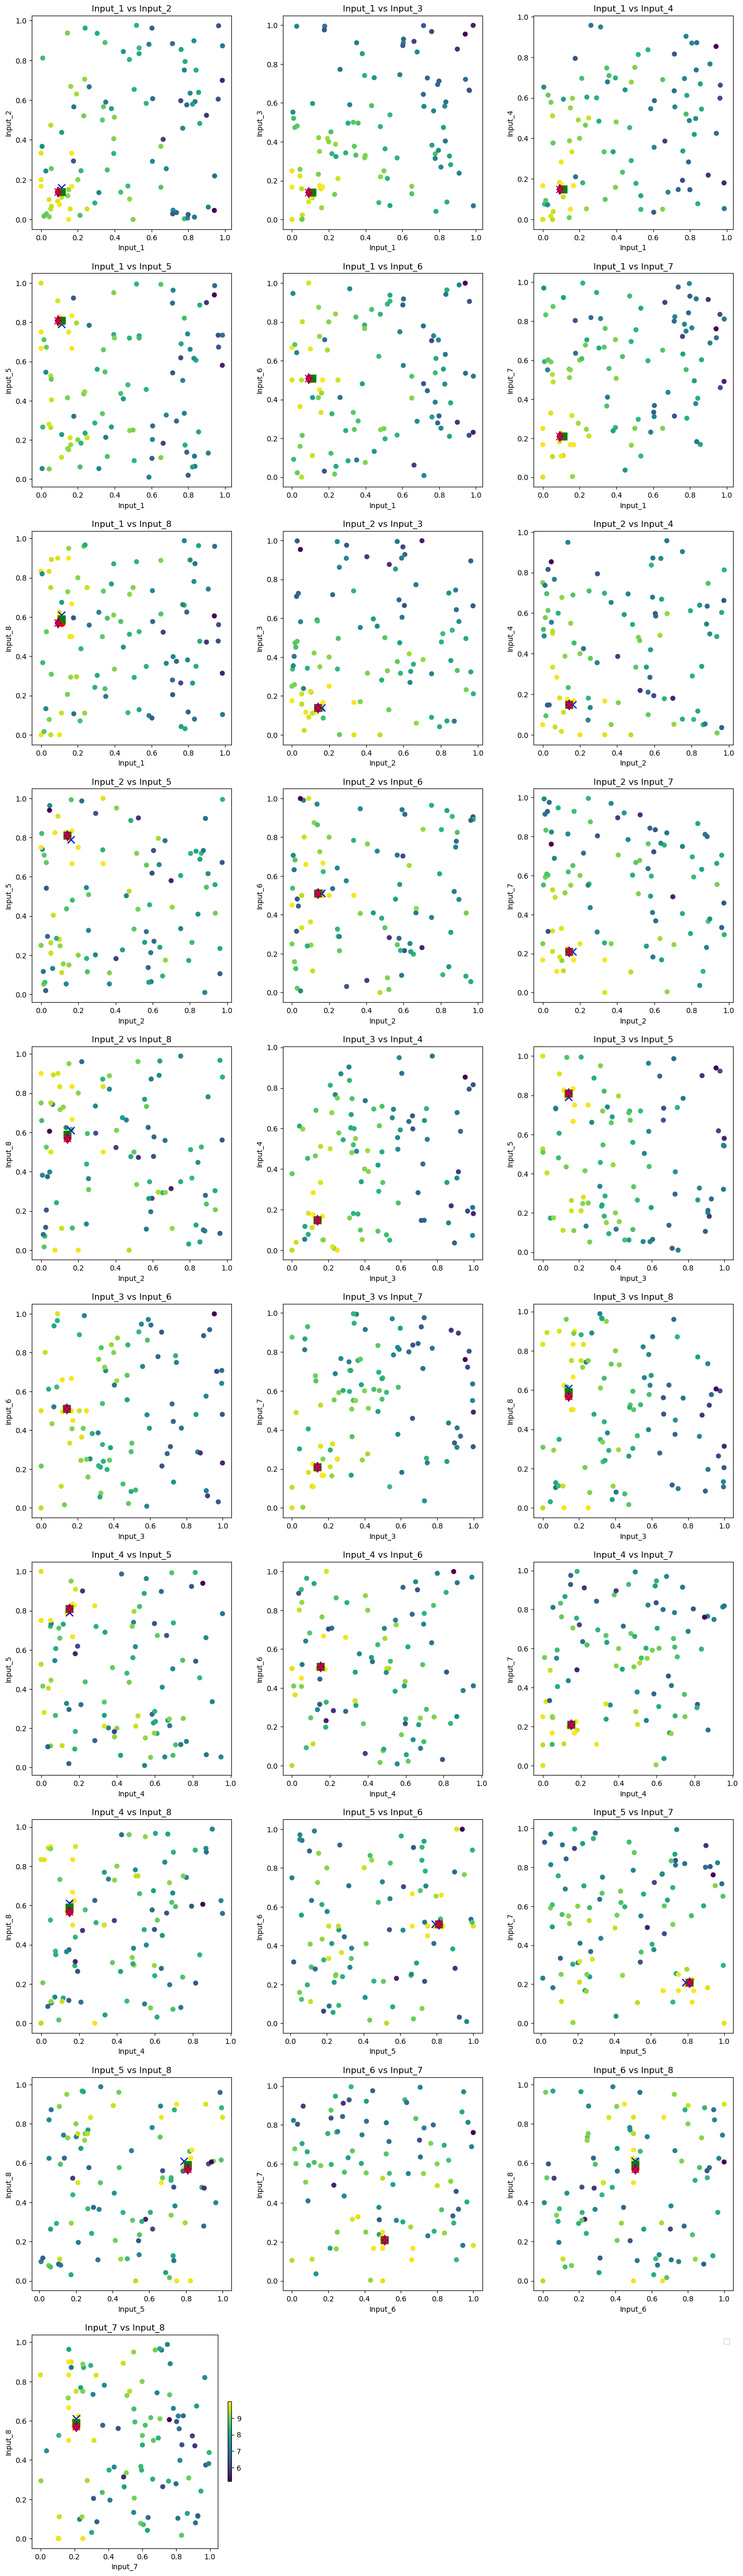

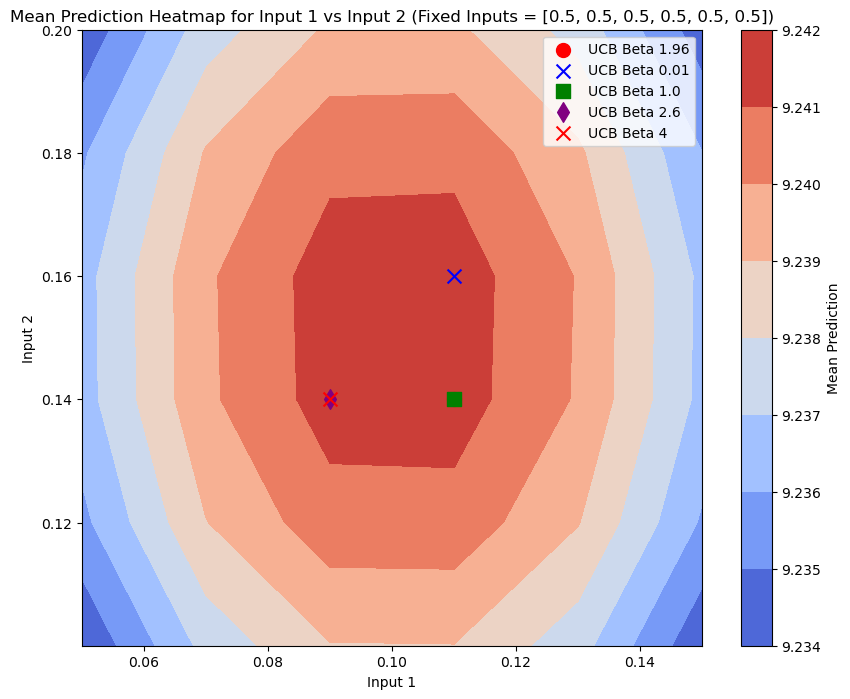

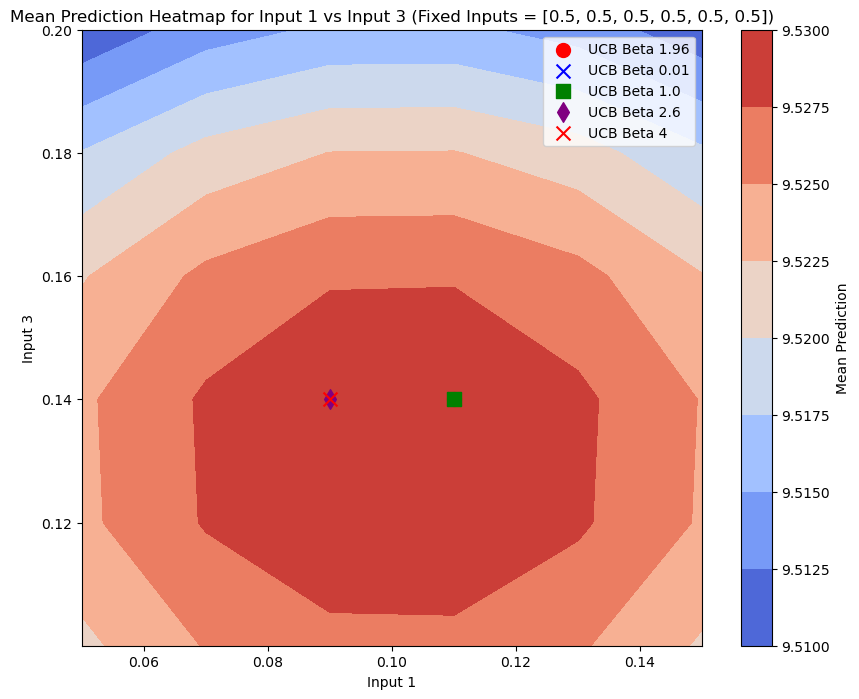

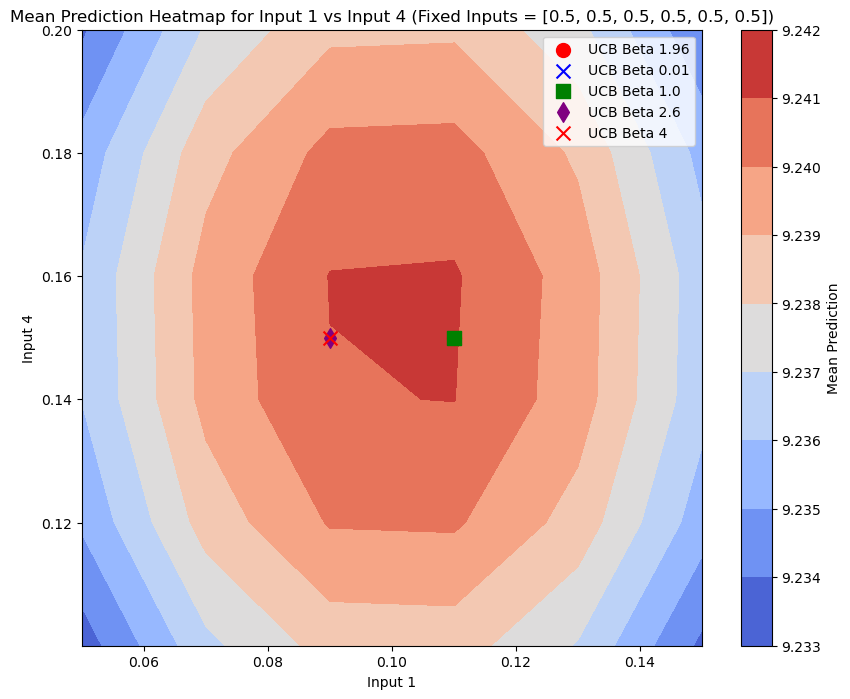

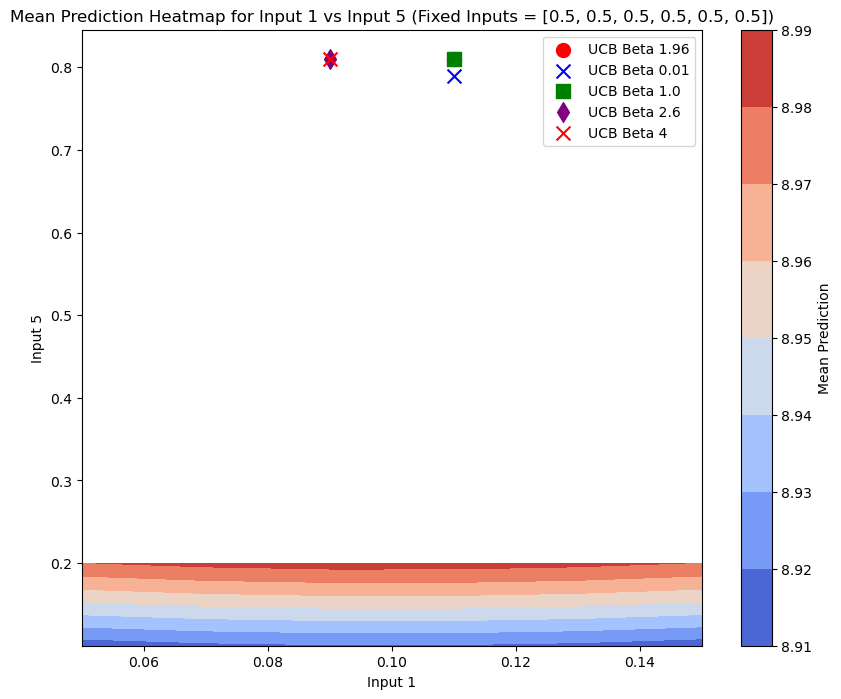

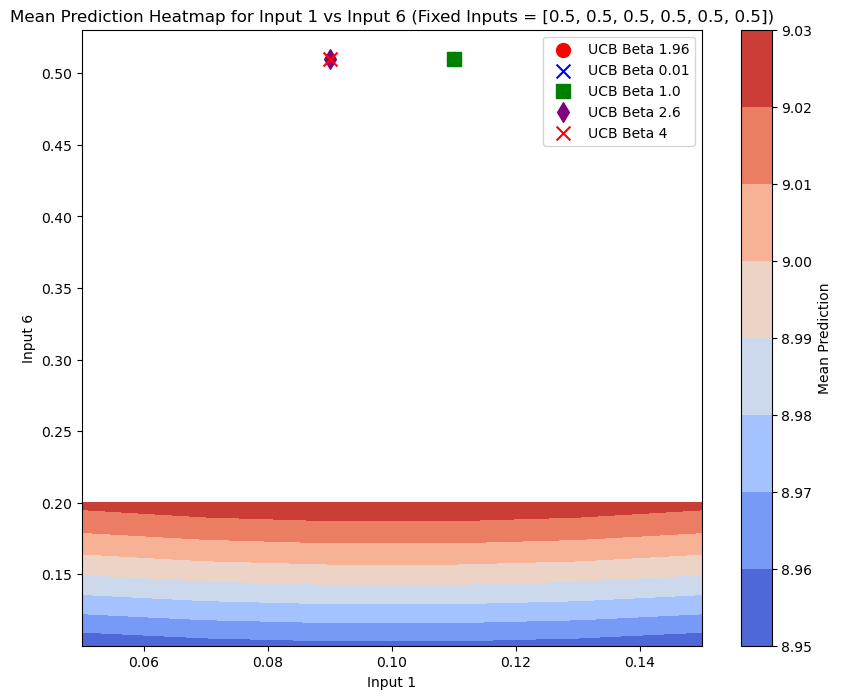

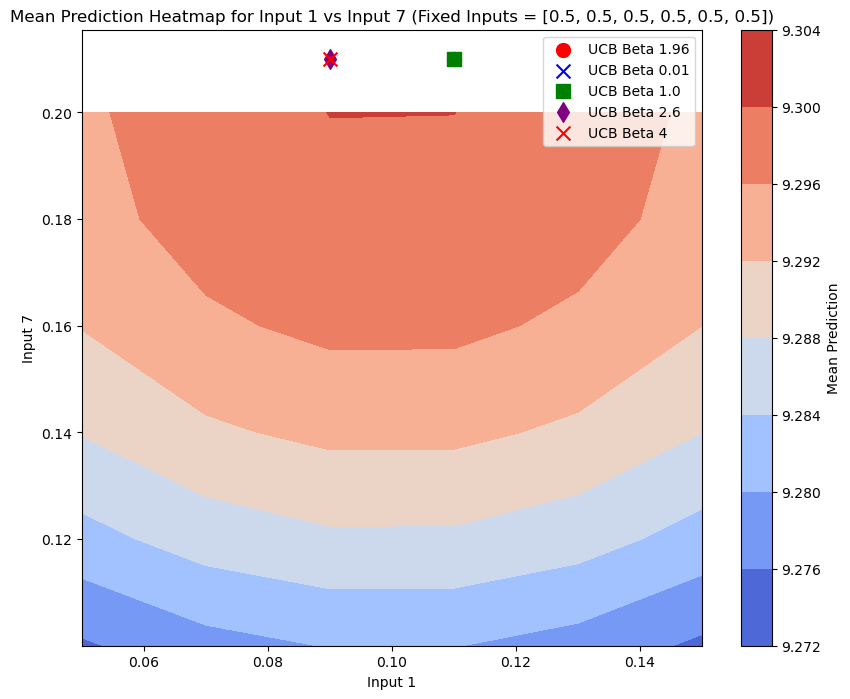

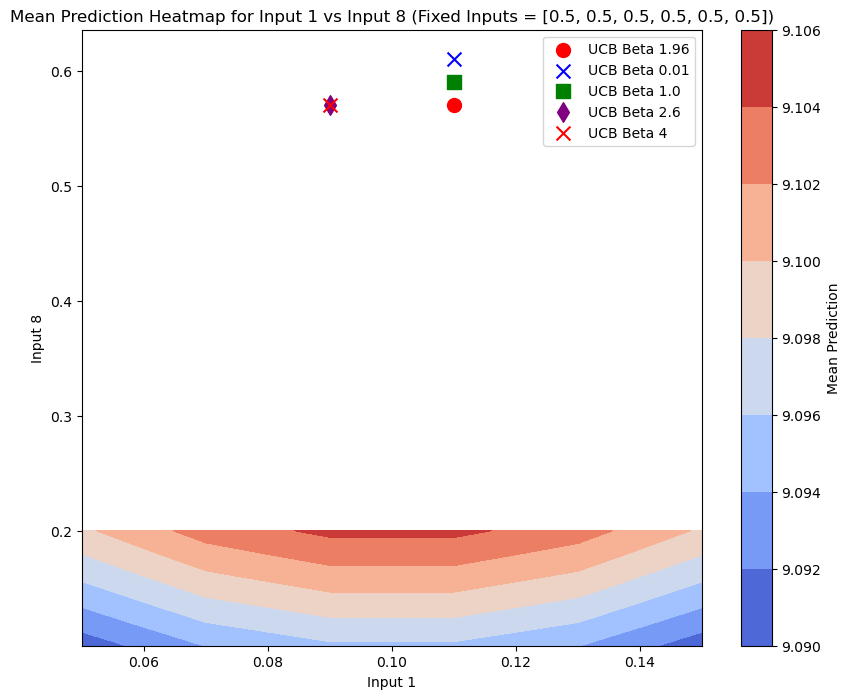

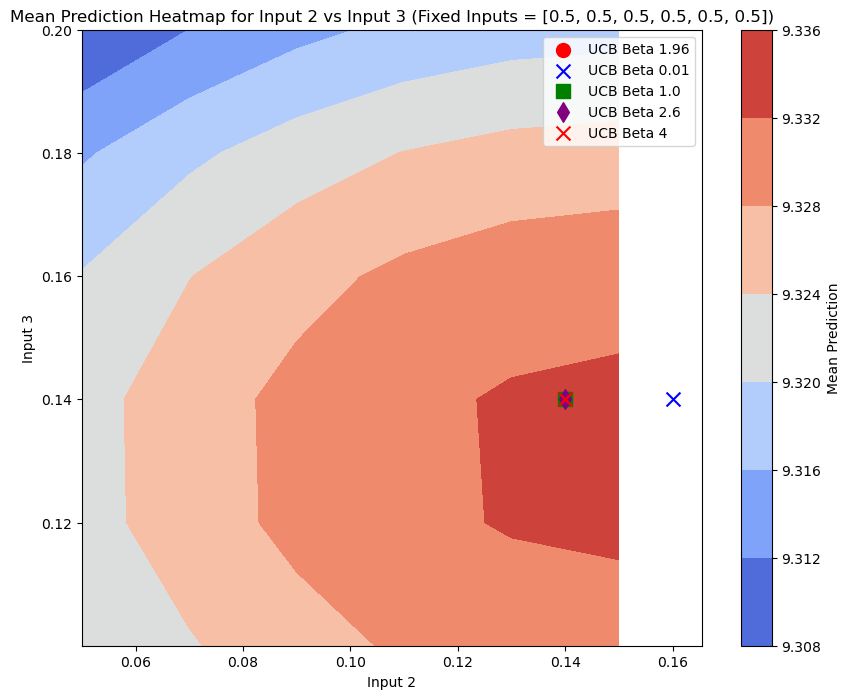

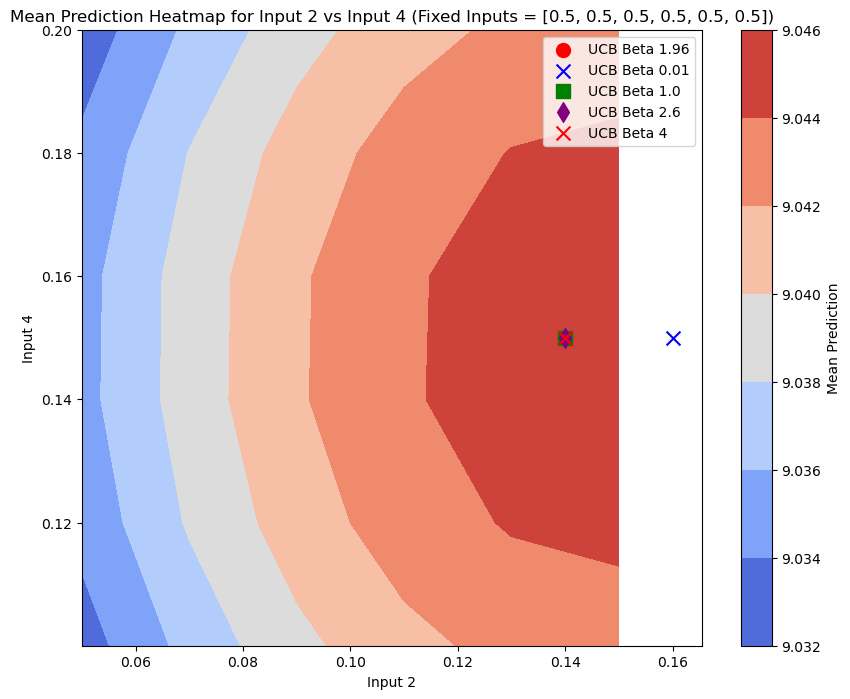

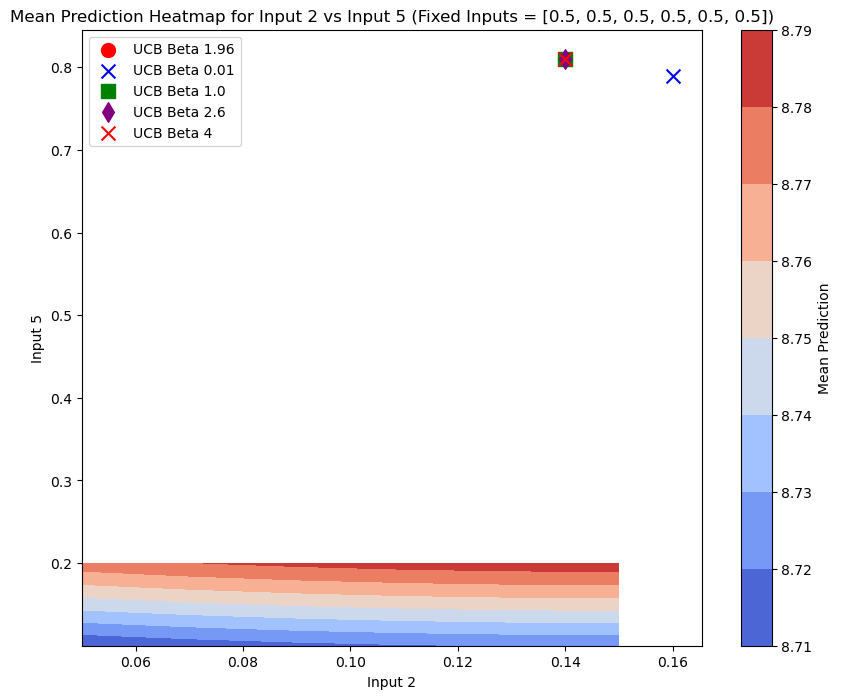

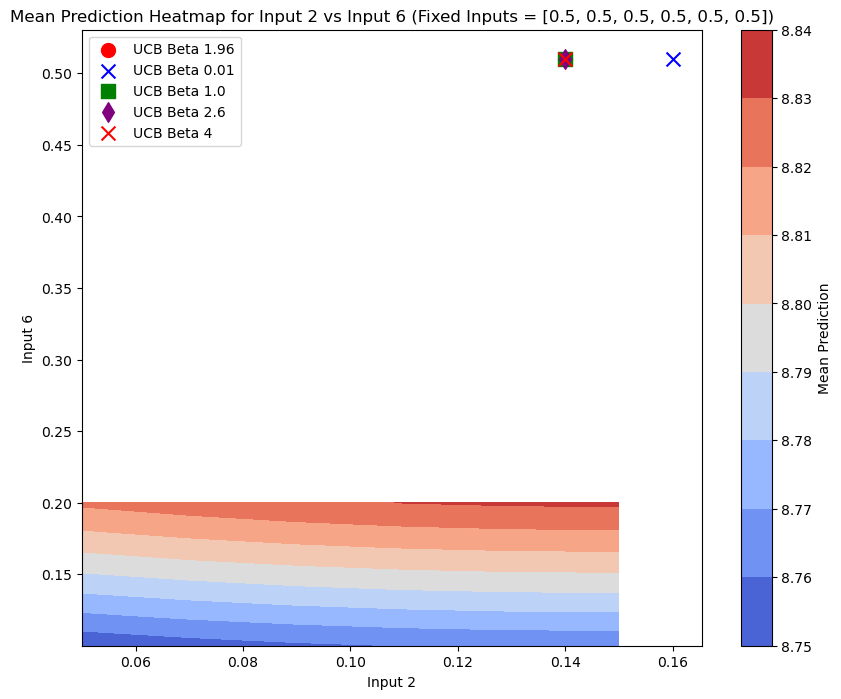

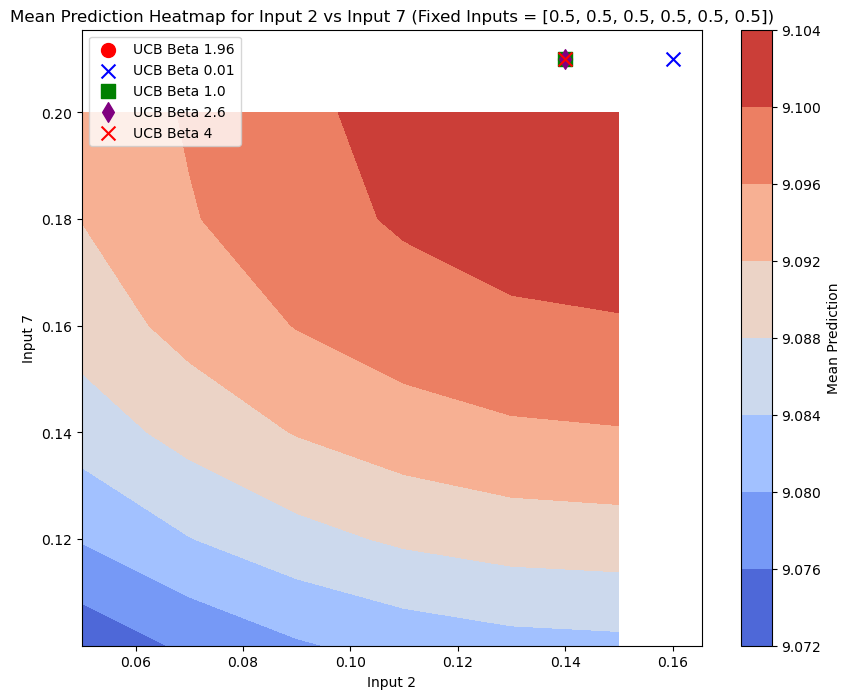

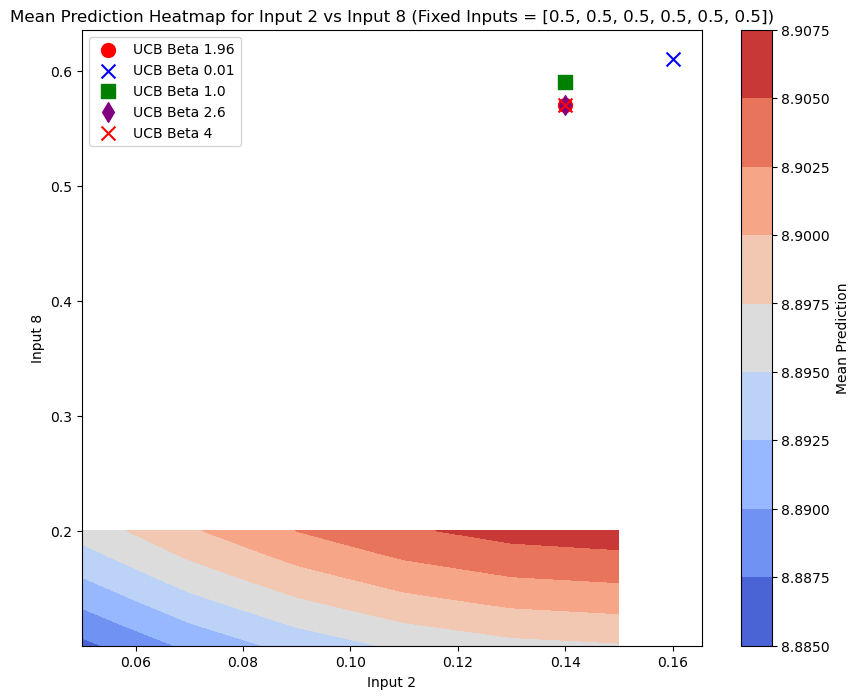

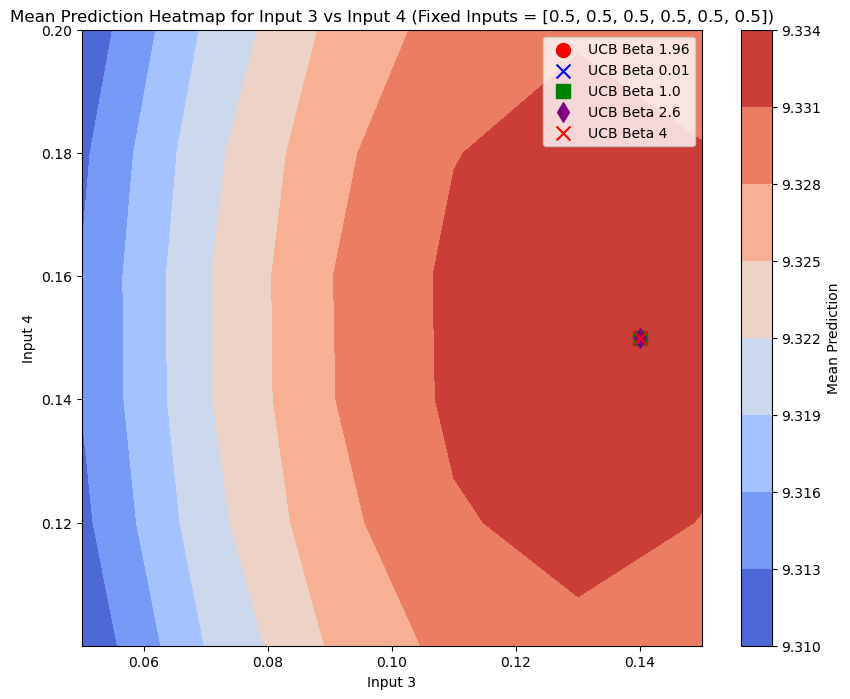

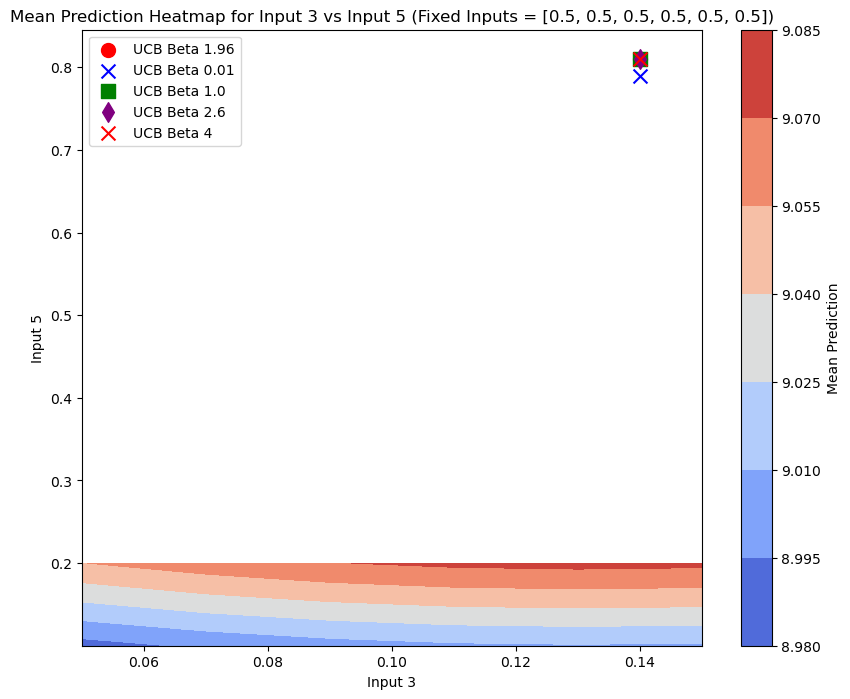

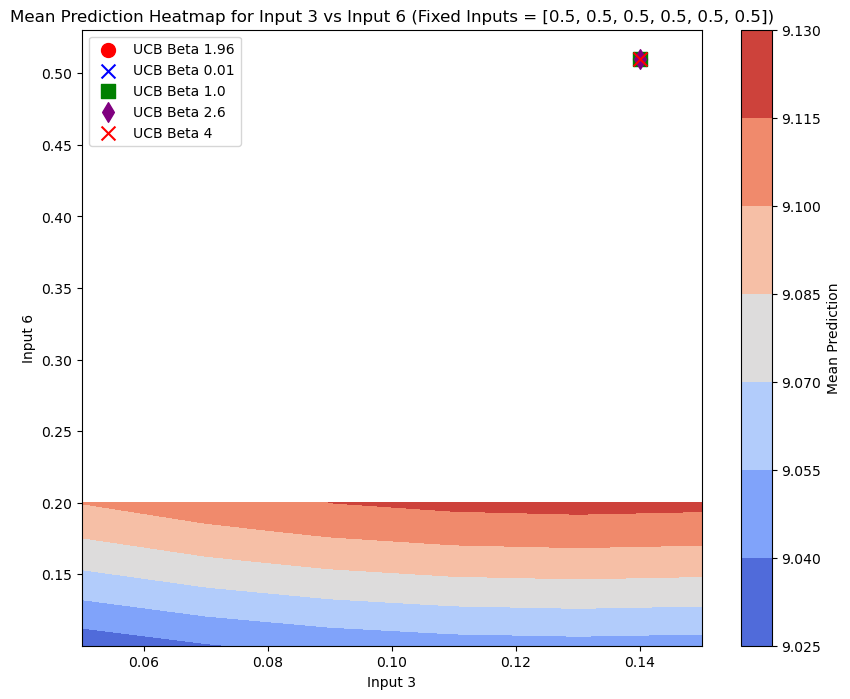

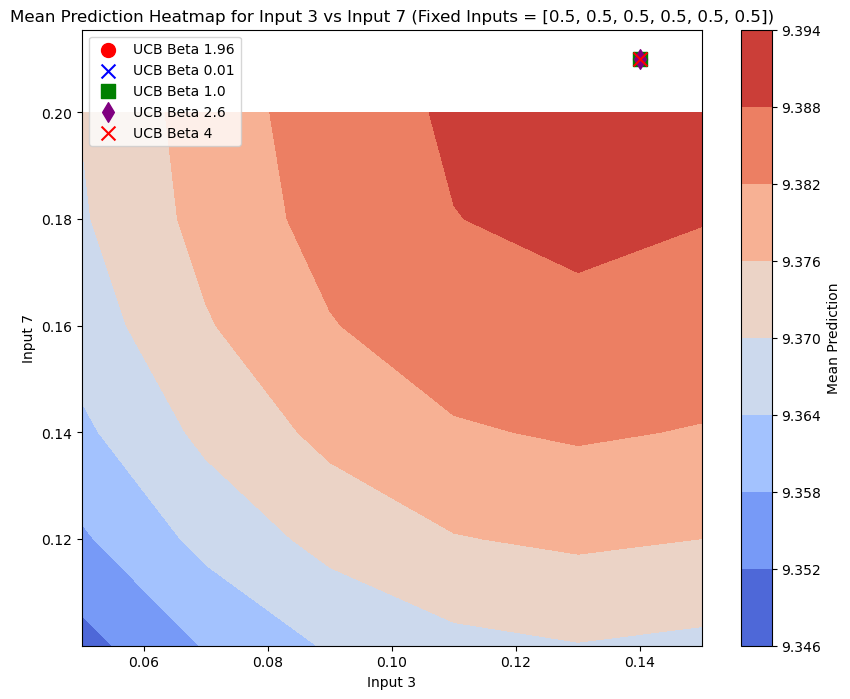

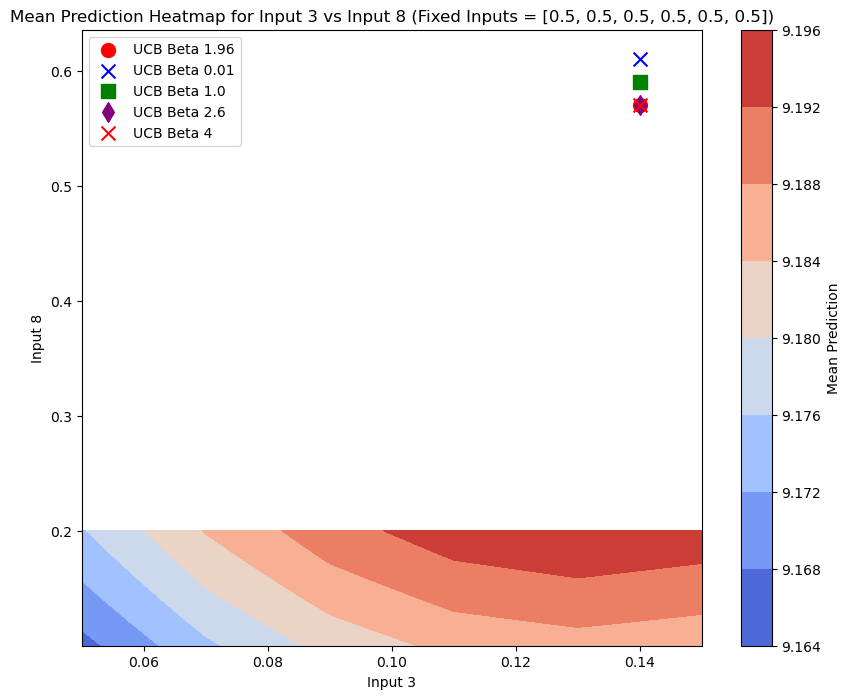

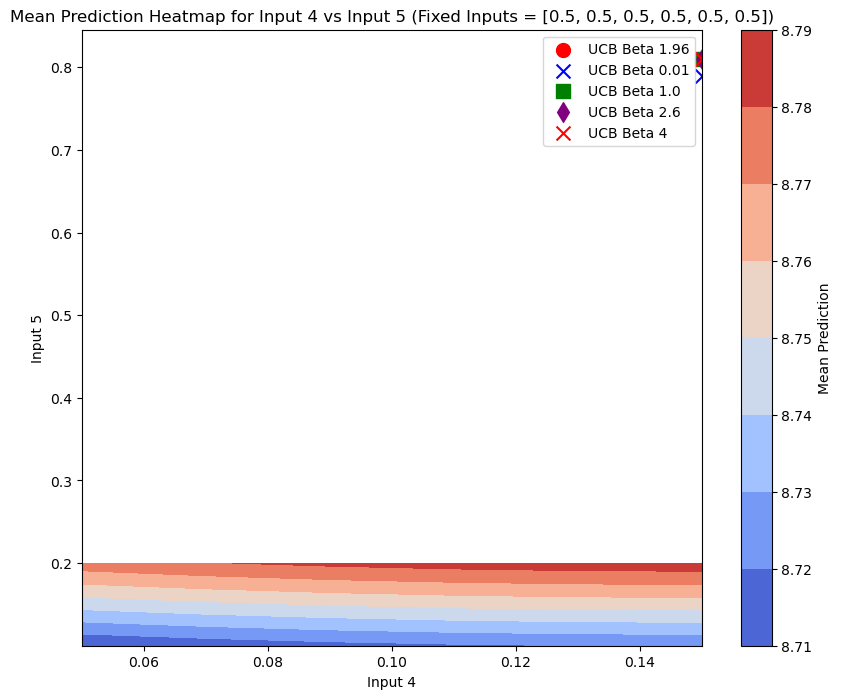

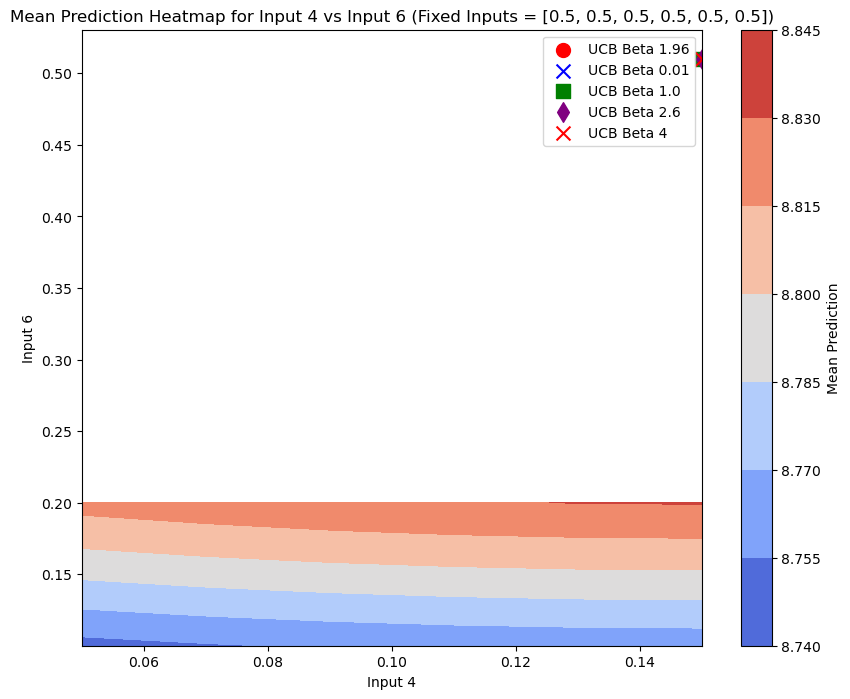

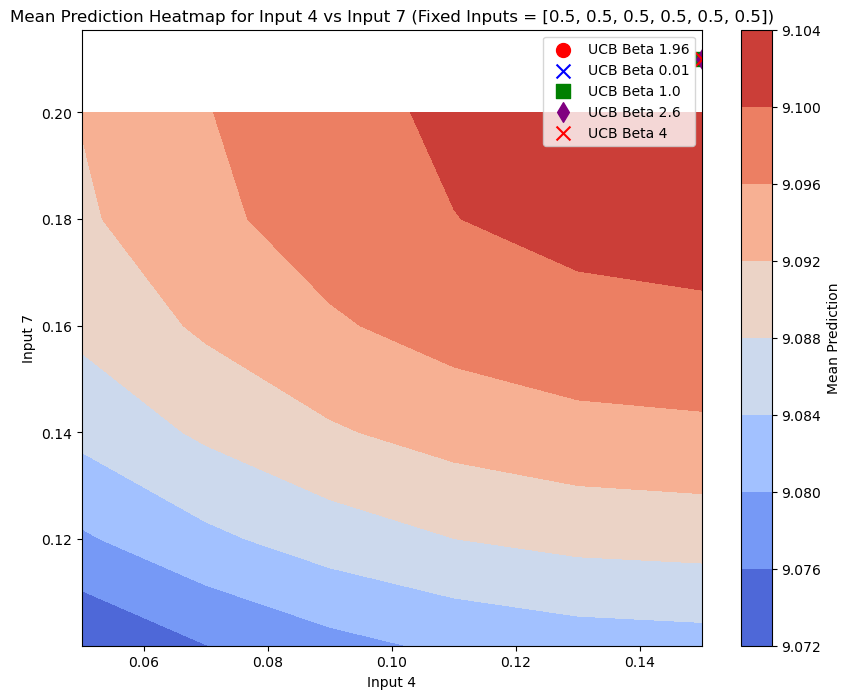

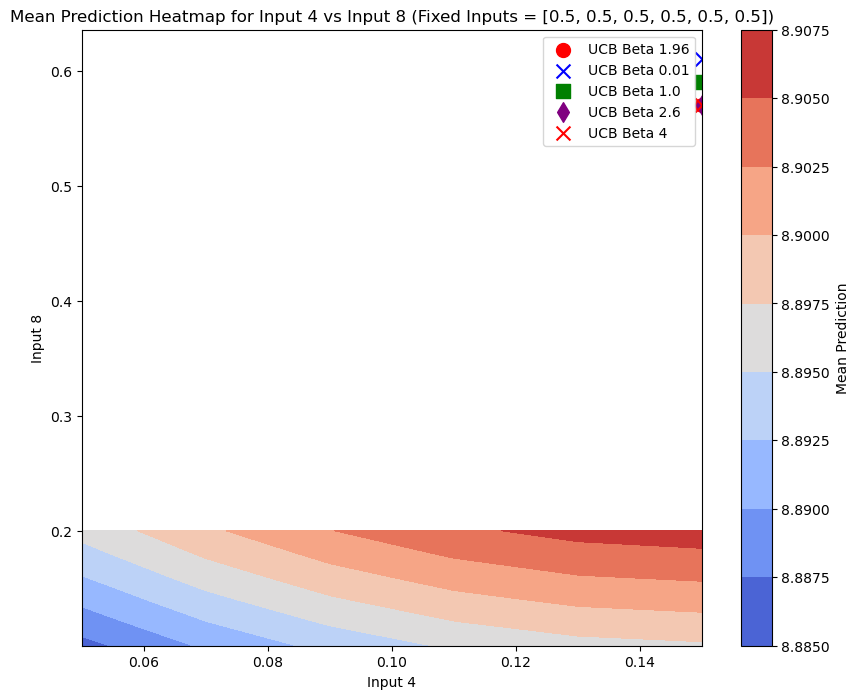

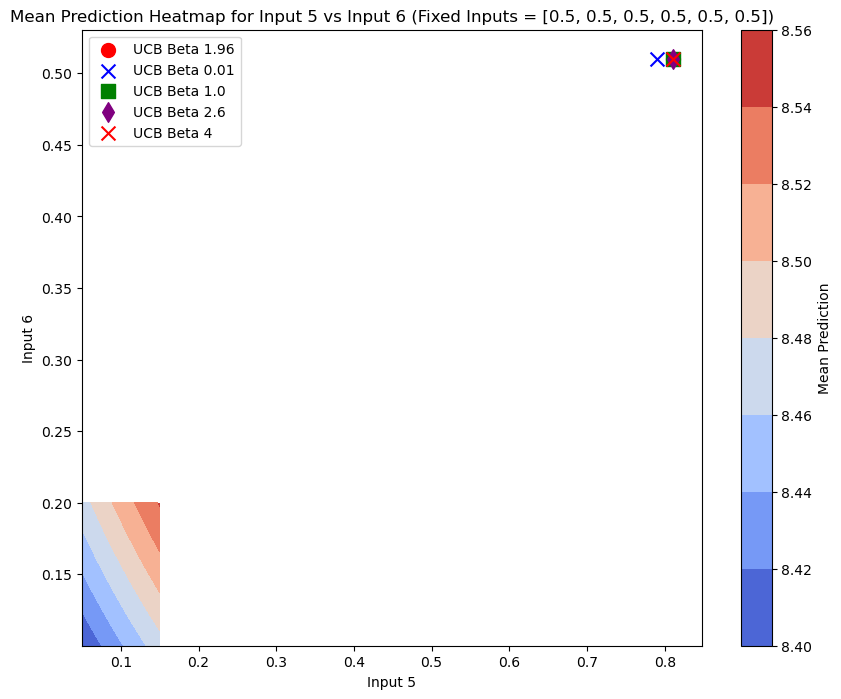

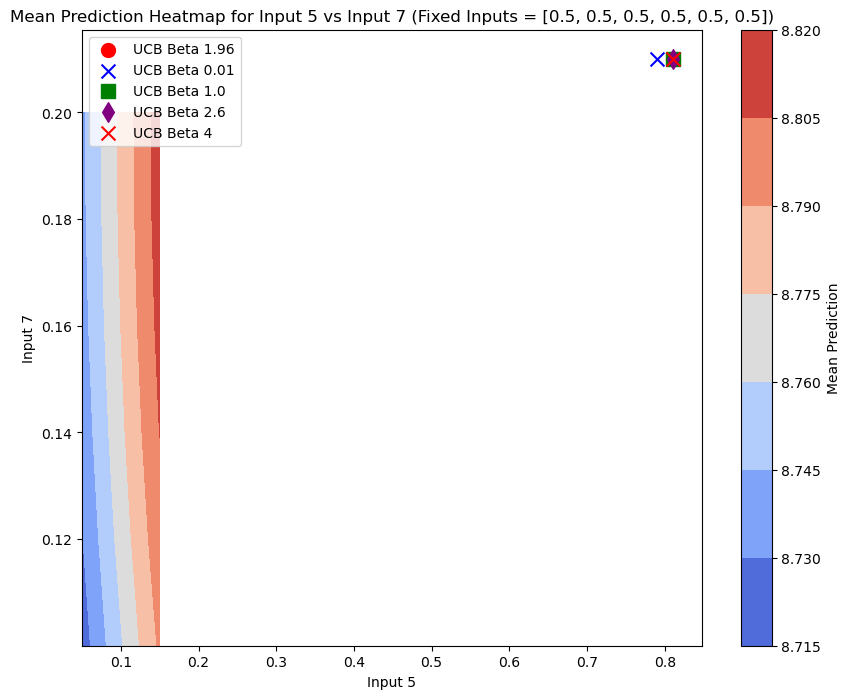

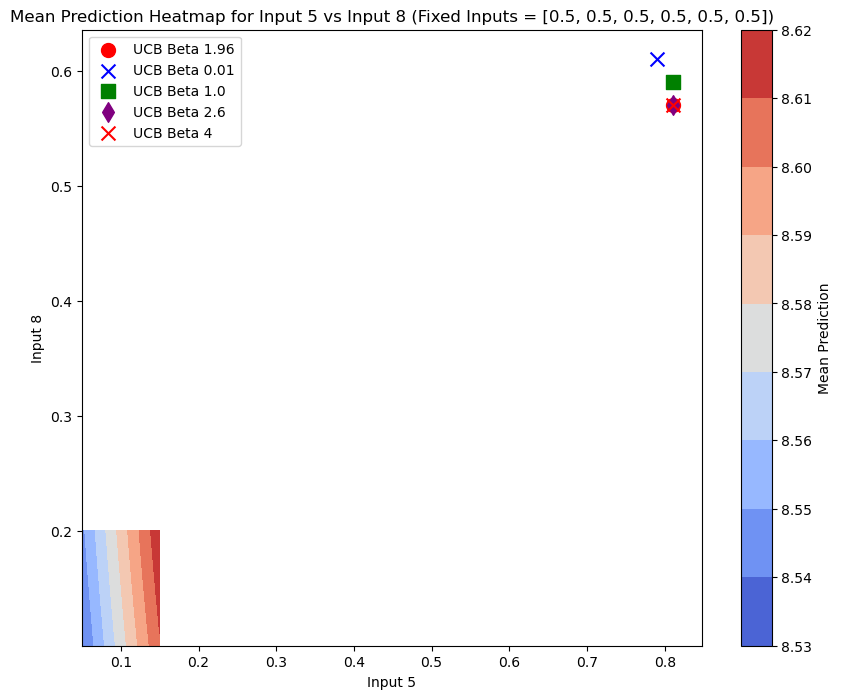

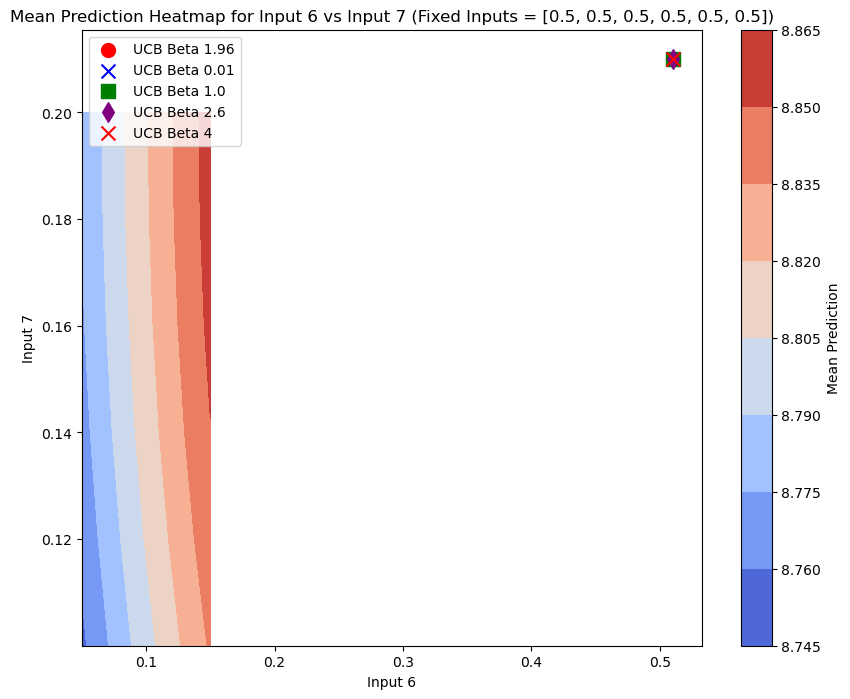

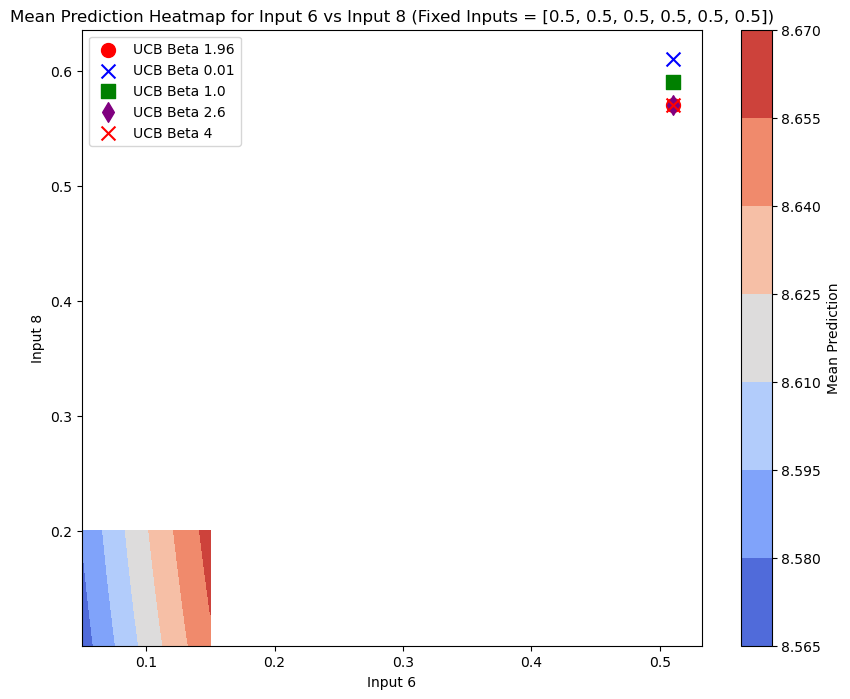

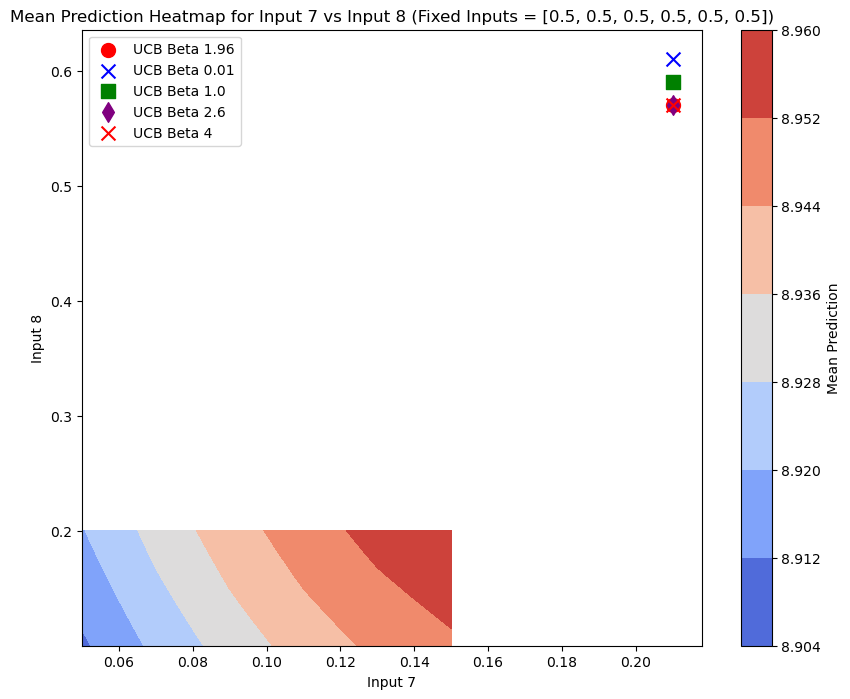

In [10]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)